In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

In [2]:
inp0= pd.read_csv("application_data.csv",na_values=' ')
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
inp0.drop(["NAME_TYPE_SUITE","REGION_POPULATION_RELATIVE","DAYS_ID_PUBLISH","OWN_CAR_AGE","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","APARTMENTS_AVG","BASEMENTAREA_AVG","YEARS_BEGINEXPLUATATION_AVG","YEARS_BUILD_AVG","COMMONAREA_AVG","ELEVATORS_AVG","ENTRANCES_AVG","FLOORSMAX_AVG","FLOORSMIN_AVG","LANDAREA_AVG","LIVINGAPARTMENTS_AVG","LIVINGAREA_AVG","NONLIVINGAPARTMENTS_AVG","NONLIVINGAREA_AVG","APARTMENTS_MODE","BASEMENTAREA_MODE","YEARS_BEGINEXPLUATATION_MODE",
"YEARS_BUILD_MODE","COMMONAREA_MODE","ELEVATORS_MODE","ENTRANCES_MODE","FLOORSMAX_MODE","FLOORSMIN_MODE","LANDAREA_MODE","LIVINGAPARTMENTS_MODE","LIVINGAREA_MODE","NONLIVINGAPARTMENTS_MODE","NONLIVINGAREA_MODE","APARTMENTS_MEDI","BASEMENTAREA_MEDI","YEARS_BEGINEXPLUATATION_MEDI","YEARS_BUILD_MEDI","COMMONAREA_MEDI","ELEVATORS_MEDI","ENTRANCES_MEDI","FLOORSMAX_MEDI","FLOORSMIN_MEDI","LANDAREA_MEDI",
"LIVINGAPARTMENTS_MEDI","LIVINGAREA_MEDI","NONLIVINGAPARTMENTS_MEDI","NONLIVINGAREA_MEDI","FONDKAPREMONT_MODE","HOUSETYPE_MODE",
"TOTALAREA_MODE","FLAG_MOBIL" ,"FLAG_EMP_PHONE" ,"FLAG_WORK_PHONE" ,"FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","WALLSMATERIAL_MODE","EMERGENCYSTATE_MODE","OBS_30_CNT_SOCIAL_CIRCLE","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"],axis=1,inplace=True)

In [4]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,Laborers,1.0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,Core staff,2.0,School,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,Laborers,1.0,Government,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,Laborers,2.0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,Core staff,1.0,Religion,0.0,0.0,0.0,0.0,0.0,0.0


# Data Structure

In [5]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

In [6]:
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307509.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,-16036.995067,63815.045904,-4986.120328,2.152665,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,4363.988632,141275.766519,3522.886321,0.910682,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,-7479.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,-4504.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,-2010.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,0.000000,20.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
print(100*inp0.isnull().sum()/len(inp0.index)) #% of Null Data in table

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
ORGANIZATION_TYPE              0.000000
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631


In [8]:
inp0.nunique().sort_values()
print(inp0.CNT_FAM_MEMBERS.isnull().sum())

2


In [9]:
inp0=inp0[~inp0.CNT_FAM_MEMBERS.isnull()]
print(100*inp0.DAYS_REGISTRATION.isnull().sum()/len(inp0.index))

0.0


In [10]:
inp0.CNT_FAM_MEMBERS.isnull().sum()

0

In [11]:
inp0.loc[:,'CNT_FAM_MEMBERS']= inp0.loc[:,'CNT_FAM_MEMBERS'].astype(int)
inp0.loc[:,'DAYS_REGISTRATION']= inp0.loc[:,'DAYS_REGISTRATION'].astype(int)
print(inp0.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307509 non-null  int64  
 1   TARGET                      307509 non-null  int64  
 2   NAME_CONTRACT_TYPE          307509 non-null  object 
 3   CODE_GENDER                 307509 non-null  object 
 4   FLAG_OWN_CAR                307509 non-null  object 
 5   FLAG_OWN_REALTY             307509 non-null  object 
 6   CNT_CHILDREN                307509 non-null  int64  
 7   AMT_INCOME_TOTAL            307509 non-null  float64
 8   AMT_CREDIT                  307509 non-null  float64
 9   AMT_ANNUITY                 307497 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_INCOME_TYPE            307509 non-null  object 
 12  NAME_EDUCATION_TYPE         307509 non-null  object 
 13  NAME_FAMILY_ST

In [12]:
inp0['OCCUPATION_TYPE']=inp0.OCCUPATION_TYPE.replace(np.nan,'Others',regex=True)
print(inp0.OCCUPATION_TYPE.unique())

['Laborers' 'Core staff' 'Accountants' 'Managers' 'Others' 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']


In [13]:
inp0.AMT_ANNUITY.isnull().sum()

12

In [14]:
# dropping NULLs
inp0=inp0[~inp0.AMT_ANNUITY.isnull()] 
inp0=inp0[~inp0.AMT_GOODS_PRICE.isnull()]


In [15]:
print(inp0.CODE_GENDER.unique())

['M' 'F' 'XNA']


In [16]:
inp0=inp0[~inp0.CODE_GENDER.str.contains('XNA')]

In [17]:
inp0['Total_Number_of_Credit_Bureau_Checks']=inp0.AMT_REQ_CREDIT_BUREAU_HOUR+inp0.AMT_REQ_CREDIT_BUREAU_DAY+inp0.AMT_REQ_CREDIT_BUREAU_WEEK+inp0.AMT_REQ_CREDIT_BUREAU_MON+inp0.AMT_REQ_CREDIT_BUREAU_QRT+inp0.AMT_REQ_CREDIT_BUREAU_YEAR
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Total_Number_of_Credit_Bureau_Checks
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648,Laborers,1,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186,Core staff,2,School,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260,Laborers,1,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833,Laborers,2,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311,Core staff,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
inp0.drop(["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"],axis=1,inplace=True)


In [19]:
inp0.Total_Number_of_Credit_Bureau_Checks.isnull().sum()

41472

In [20]:
inp0['Total_Number_of_Credit_Bureau_Checks']=inp0['Total_Number_of_Credit_Bureau_Checks'].fillna(0)
inp0.loc[:,'Total_Number_of_Credit_Bureau_Checks']= inp0.loc[:,'Total_Number_of_Credit_Bureau_Checks'].astype(int)

In [21]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307217 entries, 0 to 307510
Data columns (total 22 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SK_ID_CURR                            307217 non-null  int64  
 1   TARGET                                307217 non-null  int64  
 2   NAME_CONTRACT_TYPE                    307217 non-null  object 
 3   CODE_GENDER                           307217 non-null  object 
 4   FLAG_OWN_CAR                          307217 non-null  object 
 5   FLAG_OWN_REALTY                       307217 non-null  object 
 6   CNT_CHILDREN                          307217 non-null  int64  
 7   AMT_INCOME_TOTAL                      307217 non-null  float64
 8   AMT_CREDIT                            307217 non-null  float64
 9   AMT_ANNUITY                           307217 non-null  float64
 10  AMT_GOODS_PRICE                       307217 non-null  float64
 11  

In [22]:
print(100*inp0.isnull().sum()/len(inp0.index)) # checking if all Nulls are removed

SK_ID_CURR                              0.0
TARGET                                  0.0
NAME_CONTRACT_TYPE                      0.0
CODE_GENDER                             0.0
FLAG_OWN_CAR                            0.0
FLAG_OWN_REALTY                         0.0
CNT_CHILDREN                            0.0
AMT_INCOME_TOTAL                        0.0
AMT_CREDIT                              0.0
AMT_ANNUITY                             0.0
AMT_GOODS_PRICE                         0.0
NAME_INCOME_TYPE                        0.0
NAME_EDUCATION_TYPE                     0.0
NAME_FAMILY_STATUS                      0.0
NAME_HOUSING_TYPE                       0.0
DAYS_BIRTH                              0.0
DAYS_EMPLOYED                           0.0
DAYS_REGISTRATION                       0.0
OCCUPATION_TYPE                         0.0
CNT_FAM_MEMBERS                         0.0
ORGANIZATION_TYPE                       0.0
Total_Number_of_Credit_Bureau_Checks    0.0
dtype: float64


In [23]:
print(inp0.ORGANIZATION_TYPE.str.count("XNA").sum())
print(inp0.NAME_INCOME_TYPE.str.count("XNA").sum())
print(inp0.NAME_EDUCATION_TYPE.str.count("XNA").sum())
print(inp0.NAME_FAMILY_STATUS.str.count("XNA").sum())
print(inp0.NAME_HOUSING_TYPE.str.count("XNA").sum())

55352
0
0
0
0


In [24]:
print(inp0.ORGANIZATION_TYPE.value_counts())#Count of each month

Business Entity Type 3    67930
XNA                       55352
Self-employed             38357
Other                     16667
Medicine                  11180
Business Entity Type 2    10542
Government                10390
School                     8883
Trade: type 7              7826
Kindergarten               6871
Construction               6714
Business Entity Type 1     5980
Transport: type 4          5392
Trade: type 3              3489
Industry: type 9           3367
Industry: type 3           3275
Security                   3241
Housing                    2953
Industry: type 11          2703
Military                   2630
Bank                       2505
Agriculture                2451
Police                     2337
Transport: type 2          2203
Postal                     2154
Security Ministries        1972
Trade: type 2              1892
Restaurant                 1807
Services                   1573
University                 1326
Industry: type 7           1307
Transpor

In [25]:
ORGANIZATION_TYPE_mode=inp0.ORGANIZATION_TYPE.mode()[0]
print(ORGANIZATION_TYPE_mode)

Business Entity Type 3


In [26]:
inp0['ORGANIZATION_TYPE']=inp0.ORGANIZATION_TYPE.replace(to_replace='XNA', value=ORGANIZATION_TYPE_mode)
inp0.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    123282
Self-employed              38357
Other                      16667
Medicine                   11180
Business Entity Type 2     10542
Government                 10390
School                      8883
Trade: type 7               7826
Kindergarten                6871
Construction                6714
Business Entity Type 1      5980
Transport: type 4           5392
Trade: type 3               3489
Industry: type 9            3367
Industry: type 3            3275
Security                    3241
Housing                     2953
Industry: type 11           2703
Military                    2630
Bank                        2505
Agriculture                 2451
Police                      2337
Transport: type 2           2203
Postal                      2154
Security Ministries         1972
Trade: type 2               1892
Restaurant                  1807
Services                    1573
University                  1326
Industry: type 7            1307
Transport:

In [27]:
inp0["AGE"]=inp0.DAYS_BIRTH.apply(lambda x:math.ceil(abs(x)/365))
inp0["Expeirience"]=inp0.DAYS_EMPLOYED.apply(lambda x:round(abs(x)/365,2))
inp0["REGISTRATION_YEARS"]=inp0.DAYS_REGISTRATION.apply(lambda x:round(abs(x)/365,2))
inp0.drop(["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION"],axis=1,inplace=True)

In [28]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307217 entries, 0 to 307510
Data columns (total 22 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SK_ID_CURR                            307217 non-null  int64  
 1   TARGET                                307217 non-null  int64  
 2   NAME_CONTRACT_TYPE                    307217 non-null  object 
 3   CODE_GENDER                           307217 non-null  object 
 4   FLAG_OWN_CAR                          307217 non-null  object 
 5   FLAG_OWN_REALTY                       307217 non-null  object 
 6   CNT_CHILDREN                          307217 non-null  int64  
 7   AMT_INCOME_TOTAL                      307217 non-null  float64
 8   AMT_CREDIT                            307217 non-null  float64
 9   AMT_ANNUITY                           307217 non-null  float64
 10  AMT_GOODS_PRICE                       307217 non-null  float64
 11  

# Checking Outliers for 5 Variables as mentioned in question

In [29]:
inp0.CNT_CHILDREN.describe() #chk children outlier

count    307217.000000
mean          0.416972
std           0.722044
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

0.05     0.0
0.10     0.0
0.25     0.0
0.50     0.0
0.75     1.0
0.90     2.0
0.95     2.0
0.97     2.0
0.98     2.0
0.99     3.0
1.00    19.0
Name: CNT_CHILDREN, dtype: float64


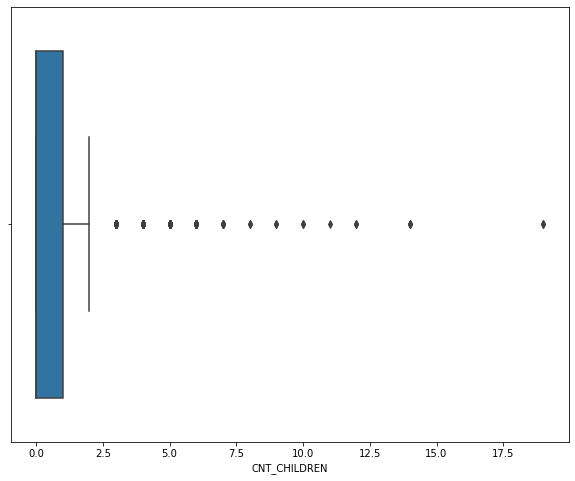

In [30]:
print(inp0.CNT_CHILDREN.quantile([0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.97,0.98,0.99,1]))
plt.figure(figsize=(10,8))
sns.boxplot(inp0.CNT_CHILDREN)
plt.show()

In [31]:
df=inp0.loc[inp0.CNT_CHILDREN>18]
df.SK_ID_CURR

155369    280108
265784    407877
Name: SK_ID_CURR, dtype: int64

In [32]:
inp0.CNT_FAM_MEMBERS.describe() # chk Family member outlier

count    307217.000000
mean          2.152619
std           0.910621
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

0.05     1.0
0.10     1.0
0.25     2.0
0.50     2.0
0.75     3.0
0.90     3.0
0.95     4.0
0.97     4.0
0.98     4.0
0.99     5.0
1.00    20.0
Name: CNT_FAM_MEMBERS, dtype: float64


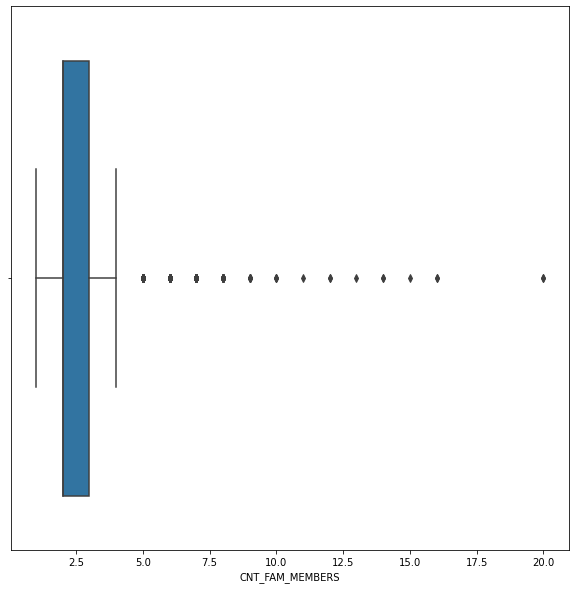

155369    280108
265784    407877
Name: SK_ID_CURR, dtype: int64


In [33]:
print(inp0.CNT_FAM_MEMBERS.quantile([0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.97,0.98,0.99,1]))
plt.figure(figsize=(10,10))
sns.boxplot(inp0.CNT_FAM_MEMBERS)
plt.show()

df=inp0.loc[inp0.CNT_FAM_MEMBERS>19]
print(df.SK_ID_CURR)

In [34]:
inp0.AMT_INCOME_TOTAL.describe() # chk total income outlier

count    3.072170e+05
mean     1.688323e+05
std      2.372214e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

0.05        67500.0
0.10        81000.0
0.25       112500.0
0.50       148500.0
0.75       202500.0
0.90       270000.0
0.95       337500.0
0.97       382500.0
0.98       427500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64


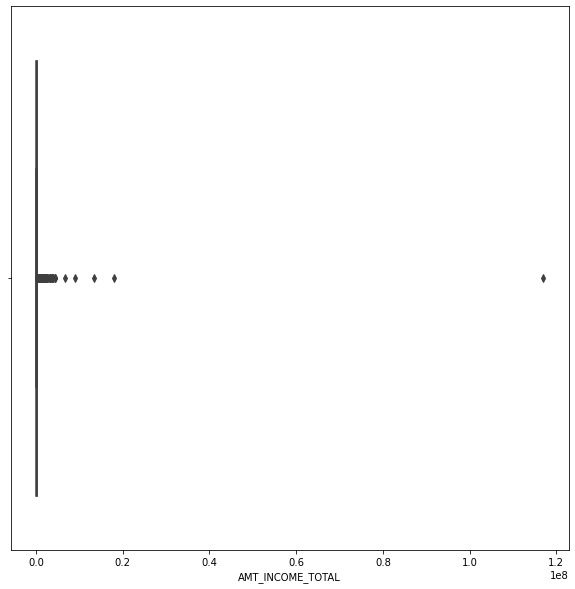

In [35]:
print(inp0.AMT_INCOME_TOTAL.quantile([0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.97,0.98,0.99,1]))
plt.figure(figsize=(10,10))
sns.boxplot(inp0.AMT_INCOME_TOTAL)
plt.show()

In [36]:
df=inp0.loc[inp0.AMT_INCOME_TOTAL>100000000.0]
print(df.SK_ID_CURR)

12840    114967
Name: SK_ID_CURR, dtype: int64


0.05     135000.0
0.10     180000.0
0.25     270000.0
0.50     514602.0
0.75     808650.0
0.90    1133748.0
0.95    1350000.0
0.97    1546020.0
0.98    1661418.0
0.99    1855755.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64


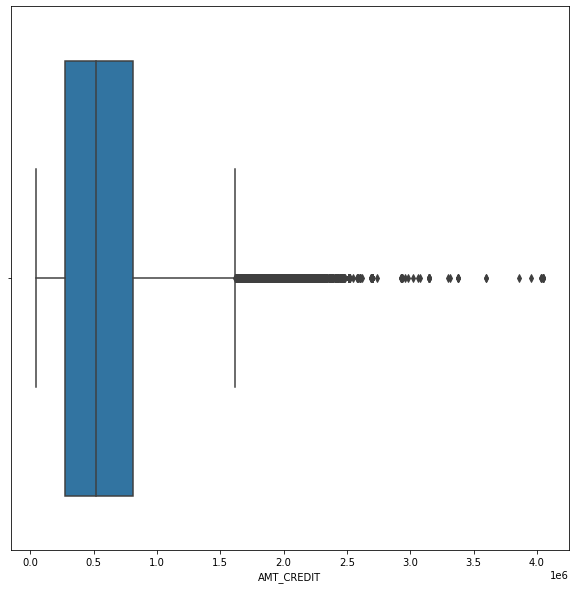

In [37]:
inp0.AMT_CREDIT.describe() #chk amt credit outlier
print(inp0.AMT_CREDIT.quantile([0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.97,0.98,0.99,1]))
plt.figure(figsize=(10,10))
sns.boxplot(inp0.AMT_CREDIT)
plt.show()

0.05      9000.0
0.10     11074.5
0.25     16551.0
0.50     24916.5
0.75     34596.0
0.90     45954.0
0.95     53325.0
0.97     58482.0
0.98     62964.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64


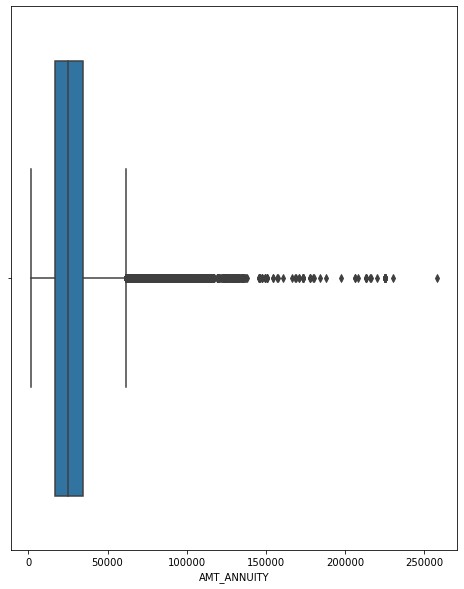

In [38]:
inp0.AMT_ANNUITY.describe()
print(inp0.AMT_ANNUITY.quantile([0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.97,0.98,0.99,1]))
plt.figure(figsize=(8,10))
sns.boxplot(inp0.AMT_ANNUITY)
plt.show()

In [39]:
df=inp0.loc[inp0.AMT_ANNUITY>258024]
print(df.SK_ID_CURR)


17948    120926
Name: SK_ID_CURR, dtype: int64


0.05     135000.0
0.10     180000.0
0.25     238500.0
0.50     450000.0
0.75     679500.0
0.90    1093500.0
0.95    1305000.0
0.97    1354500.0
0.98    1575000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64


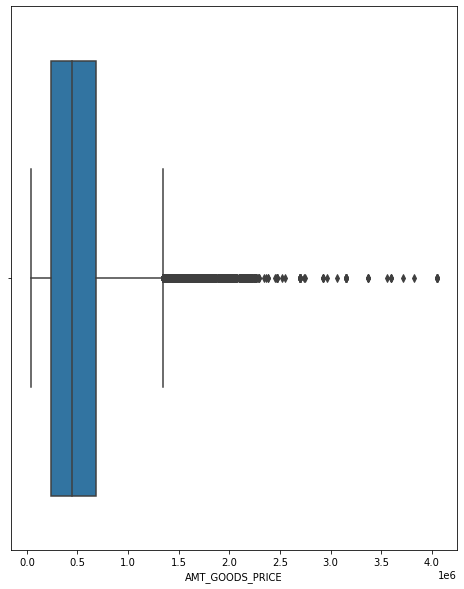

In [40]:
inp0.AMT_GOODS_PRICE.describe() #chk outlier for amount goods price
print(inp0.AMT_GOODS_PRICE.quantile([0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.97,0.98,0.99,1]))
plt.figure(figsize=(8,10))
sns.boxplot(inp0.AMT_GOODS_PRICE)
plt.show()


0.05      0.0
0.10      0.0
0.25      0.0
0.50      2.0
0.75      3.0
0.90      5.0
0.95      6.0
0.97      7.0
0.98      8.0
0.99      9.0
1.00    262.0
Name: Total_Number_of_Credit_Bureau_Checks, dtype: float64


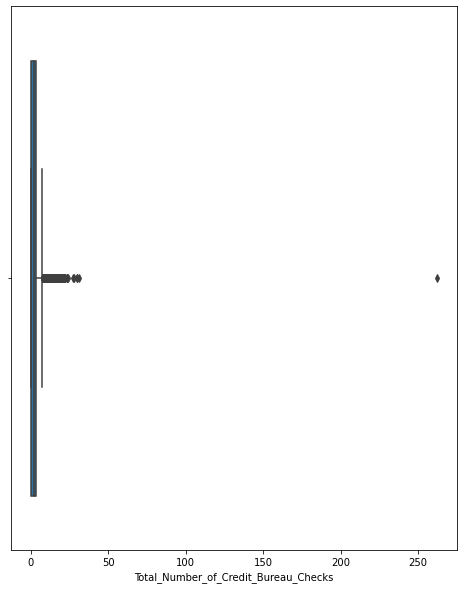

In [41]:
inp0.Total_Number_of_Credit_Bureau_Checks.describe() #chk outlier for total credit
print(inp0.Total_Number_of_Credit_Bureau_Checks.quantile([0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.97,0.98,0.99,1]))
plt.figure(figsize=(8,10))
sns.boxplot(inp0.Total_Number_of_Credit_Bureau_Checks)
plt.show()

In [42]:
df=inp0.loc[inp0.Total_Number_of_Credit_Bureau_Checks>260]
df.SK_ID_CURR

239474    377322
Name: SK_ID_CURR, dtype: int64

0.05       0.62
0.10       1.07
0.25       2.56
0.50       6.08
0.75      15.65
0.80      25.21
0.81      29.97
0.82    1000.67
0.83    1000.67
0.84    1000.67
0.85    1000.67
0.90    1000.67
0.95    1000.67
0.97    1000.67
0.98    1000.67
0.99    1000.67
1.00    1000.67
Name: Expeirience, dtype: float64


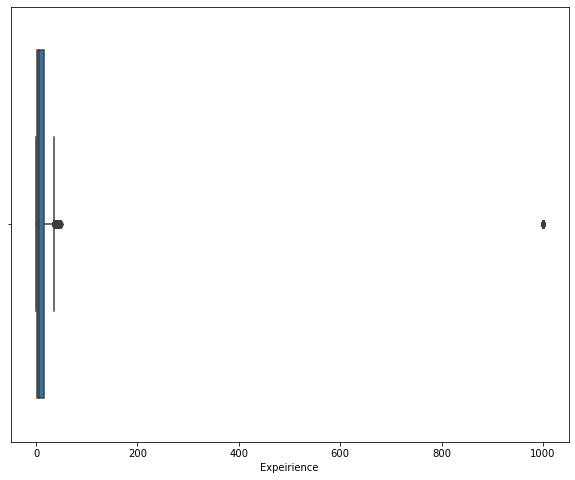

In [43]:
#chk outlier for Experience
print(inp0.Expeirience.quantile([0.05,0.1,0.25,0.5,0.75,0.80,0.81,0.82,0.83,0.84,0.85,0.9,0.95,0.97,0.98,0.99,1]))
plt.figure(figsize=(10,8))
sns.boxplot(inp0.Expeirience)
plt.show()

In [44]:
df=inp0.loc[inp0.Expeirience>1000]
df.SK_ID_CURR

8         100011
11        100015
23        100027
38        100045
43        100050
           ...  
307469    456209
307483    456227
307487    456231
307505    456249
307507    456252
Name: SK_ID_CURR, Length: 55352, dtype: int64

0.05     0.90
0.10     1.89
0.25     5.51
0.50    12.34
0.75    20.49
0.80    22.55
0.81    22.96
0.82    23.40
0.83    23.83
0.84    24.27
0.85    24.71
0.90    27.21
0.95    31.28
0.97    33.94
0.98    35.60
0.99    38.03
1.00    67.59
Name: REGISTRATION_YEARS, dtype: float64


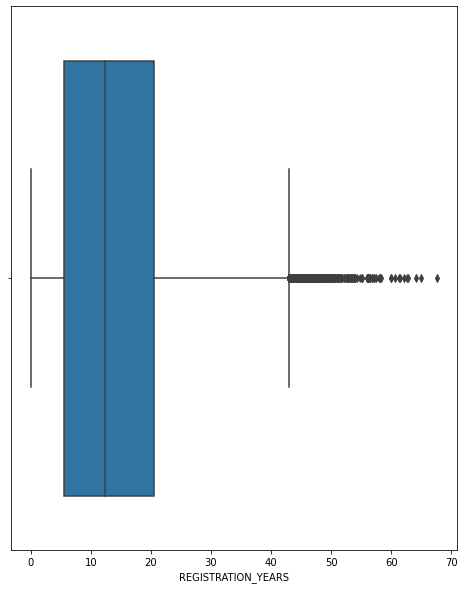

In [45]:
#chk outliers for Registraion
print(inp0.REGISTRATION_YEARS.quantile([0.05,0.1,0.25,0.5,0.75,0.80,0.81,0.82,0.83,0.84,0.85,0.9,0.95,0.97,0.98,0.99,1]))
plt.figure(figsize=(8,10))
sns.boxplot(inp0.REGISTRATION_YEARS)
plt.show()

In [46]:
df = inp0.loc[inp0.Expeirience>67]
df.SK_ID_CURR

8         100011
11        100015
23        100027
38        100045
43        100050
           ...  
307469    456209
307483    456227
307487    456231
307505    456249
307507    456252
Name: SK_ID_CURR, Length: 55352, dtype: int64

# Binning few categorical variables

In [47]:
inp0.AMT_INCOME_TOTAL.max()

117000000.0

In [48]:
inp0['Income_Buckets']=pd.cut(inp0.AMT_INCOME_TOTAL,[0,100000,500000,1000000,3000000,inp0.AMT_INCOME_TOTAL.max()],labels=['Very Low','Low','Medium','High','Very High'])
inp0.Income_Buckets.unique()

[Low, Very Low, Medium, High, Very High]
Categories (5, object): [Very Low < Low < Medium < High < Very High]

In [49]:
inp0['Age_Buckets']=pd.cut(inp0.AGE,[0,18,35,60,inp0.AGE.max()],labels=['Children','Young','Middle Age','Senior Citizen'])

inp0.Age_Buckets.unique()

[Young, Middle Age, Senior Citizen]
Categories (3, object): [Young < Middle Age < Senior Citizen]

In [51]:
inp0['Family_Size']=pd.cut(inp0.CNT_FAM_MEMBERS,[0,2,6,10,inp0.CNT_FAM_MEMBERS.max()],labels=['Small','Medium','Big','Very Big'])
print(inp0.Family_Size.unique())                      


[Small, Medium, Big, Very Big]
Categories (4, object): [Small < Medium < Big < Very Big]


In [52]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307217 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   SK_ID_CURR                            307217 non-null  int64   
 1   TARGET                                307217 non-null  int64   
 2   NAME_CONTRACT_TYPE                    307217 non-null  object  
 3   CODE_GENDER                           307217 non-null  object  
 4   FLAG_OWN_CAR                          307217 non-null  object  
 5   FLAG_OWN_REALTY                       307217 non-null  object  
 6   CNT_CHILDREN                          307217 non-null  int64   
 7   AMT_INCOME_TOTAL                      307217 non-null  float64 
 8   AMT_CREDIT                            307217 non-null  float64 
 9   AMT_ANNUITY                           307217 non-null  float64 
 10  AMT_GOODS_PRICE                       307217 non-null  f

In [53]:
 print(100*inp0.TARGET.value_counts()/len(inp0))

0    91.926228
1     8.073772
Name: TARGET, dtype: float64


In [55]:
df_1=inp0[inp0['TARGET']==1]
df_0=inp0[inp0['TARGET']==0]

In [56]:
df_1.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,Total_Number_of_Credit_Bureau_Checks,AGE,Expeirience,REGISTRATION_YEARS,Income_Buckets,Age_Buckets,Family_Size
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1,Business Entity Type 3,1,26,1.75,9.99,Low,Young,Small
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,Cooking staff,1,Business Entity Type 3,4,52,7.20,18.01,Low,Middle Age,Small
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,2,Business Entity Type 3,6,48,3.46,3.24,Low,Middle Age,Small
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Sales staff,2,Self-employed,2,37,9.85,0.12,Low,Middle Age,Small
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,Others,2,Business Entity Type 3,0,68,1000.67,14.77,Very Low,Senior Citizen,Small


In [57]:
df_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,Total_Number_of_Credit_Bureau_Checks,AGE,Expeirience,REGISTRATION_YEARS,Income_Buckets,Age_Buckets,Family_Size
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,2,School,0,46,3.25,3.25,Low,Middle Age,Small
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1,Government,0,53,0.62,11.67,Very Low,Middle Age,Small
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2,Business Entity Type 3,0,53,8.33,26.94,Low,Middle Age,Small
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,1,Religion,0,55,8.32,11.81,Low,Middle Age,Small
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,Laborers,2,Other,2,47,4.35,13.62,Very Low,Middle Age,Small


#    Univariate Analysis

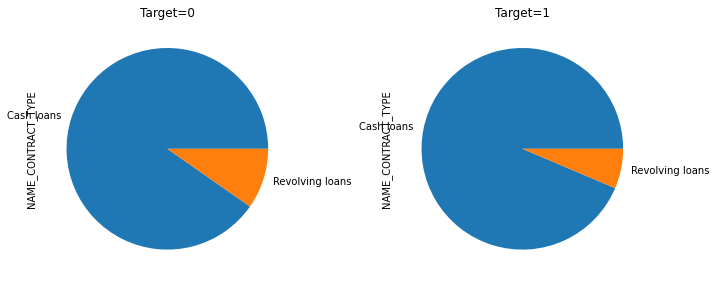

In [61]:
# Univariate analysis On categorical variable-NAME_CONTRACT_TYPE with respect to Target=0 and 1
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie()
plt.subplot(1,2,2).title.set_text('Target=1')
df_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie()
fig.tight_layout(pad=1.0)
plt.show()

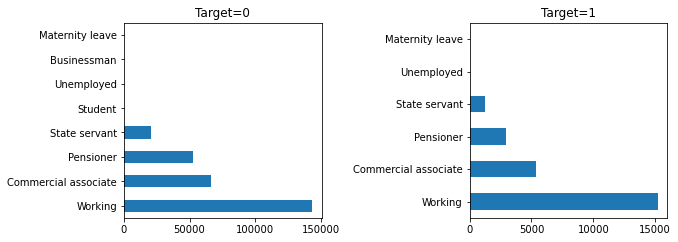

In [59]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0.NAME_INCOME_TYPE.value_counts().plot.barh()
plt.subplot(1,2,2).title.set_text('Target=1')
df_1.NAME_INCOME_TYPE.value_counts().plot.barh()
fig.tight_layout(pad=3.0)
plt.show()

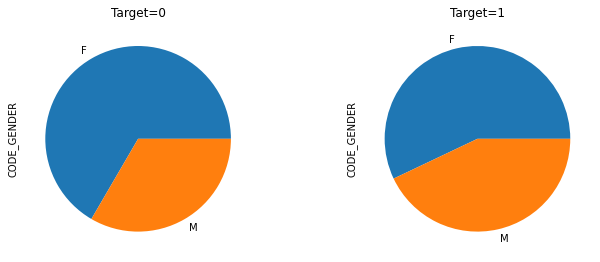

In [62]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0.CODE_GENDER.value_counts(normalize=True).plot.pie()
plt.subplot(1,2,2).title.set_text('Target=1')
df_1.CODE_GENDER.value_counts(normalize=True).plot.pie()
fig.tight_layout(pad=2.0)
plt.show()

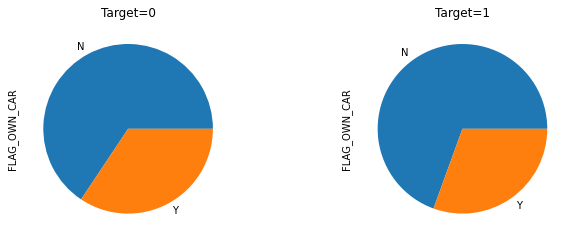

In [63]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0.FLAG_OWN_CAR.value_counts(normalize=True).plot.pie()
plt.subplot(1,2,2).title.set_text('Target=1')
df_1.FLAG_OWN_CAR.value_counts(normalize=True).plot.pie()
fig.tight_layout(pad=3.0)
plt.show()
#With the below graph we can make out the Ontime payment(0) is done by more people who are not owning a Car
#With the below graph we can make out the not doing Ontime payment(1) is also observed more in people who are not owning a Car

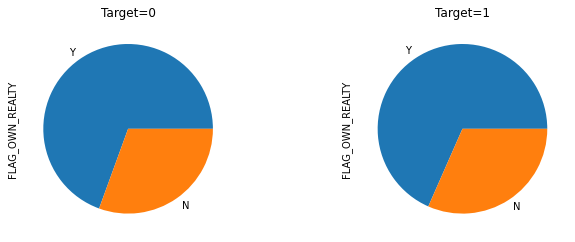

In [64]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie()
plt.subplot(1,2,2).title.set_text('Target=1')
df_1.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie()
fig.tight_layout(pad=3.0)
plt.show()
#People who own a realty is more likely to pay installments on time
#Late payment is observed with pople owning reality double when comapred to not owning number

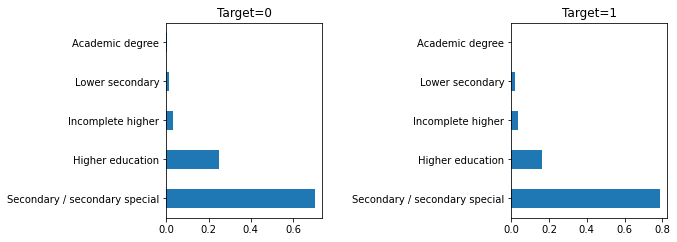

In [65]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.subplot(1,2,2).title.set_text('Target=1')
df_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
fig.tight_layout(pad=3.0)
plt.show()
#People with highter education are more likely to pay the installments without failure
#People with highter education have failed to pay installments ontime

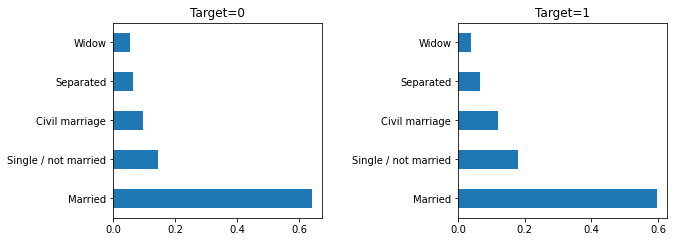

In [66]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.subplot(1,2,2).title.set_text('Target=1')
df_1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
fig.tight_layout(pad=3.0)
plt.show()

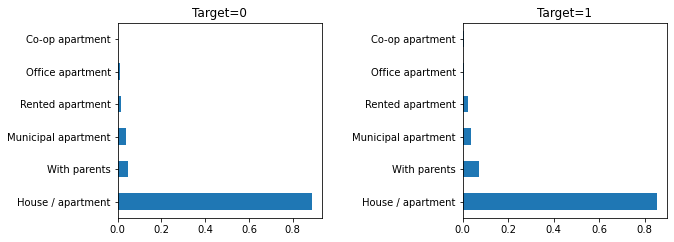

In [67]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.subplot(1,2,2).title.set_text('Target=1')
df_1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
fig.tight_layout(pad=3.0)
plt.show()

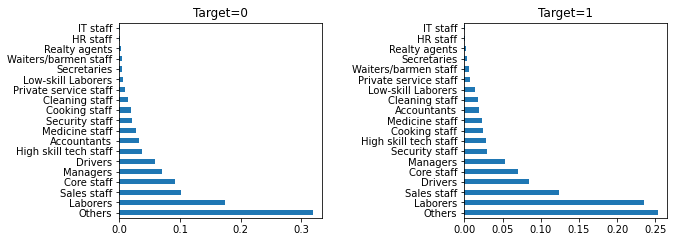

In [68]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.subplot(1,2,2).title.set_text('Target=1')
df_1.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
fig.tight_layout(pad=3.0)
plt.show()

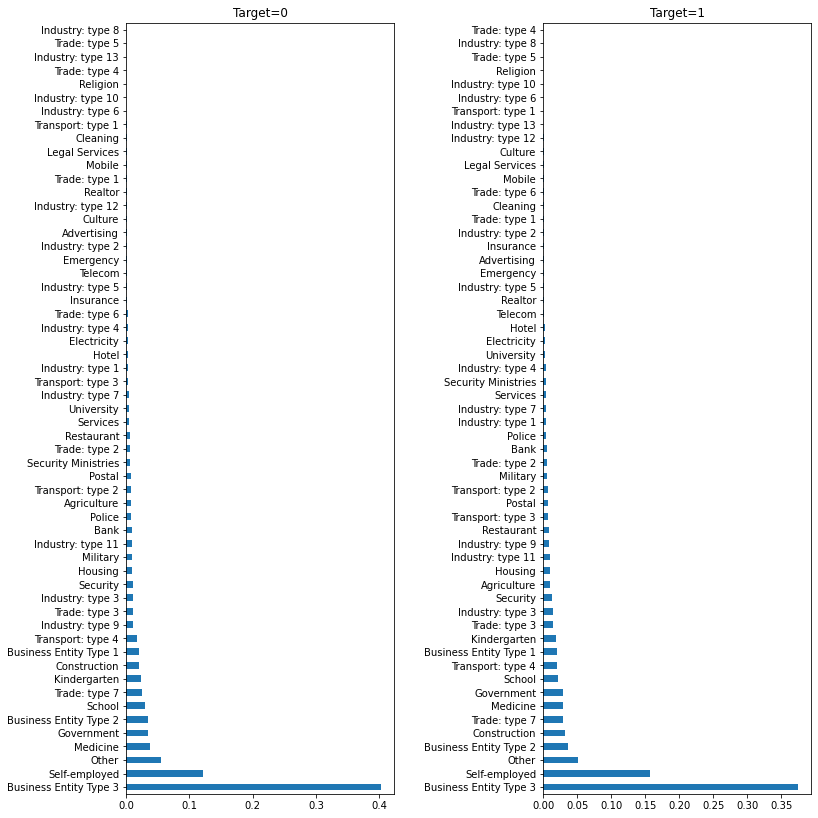

In [69]:
fig = plt.figure(figsize=(12,12))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0.ORGANIZATION_TYPE.value_counts(normalize=True).plot.barh()
plt.subplot(1,2,2).title.set_text('Target=1')
df_1.ORGANIZATION_TYPE.value_counts(normalize=True).plot.barh()
fig.tight_layout(pad=3.0)
plt.show()

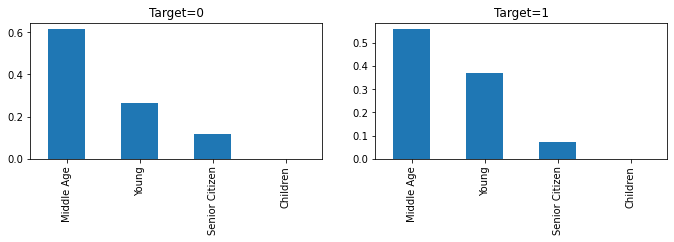

In [70]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0.Age_Buckets .value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2).title.set_text('Target=1')
df_1.Age_Buckets .value_counts(normalize=True).plot.bar()
fig.tight_layout(pad=3.0)
plt.show()

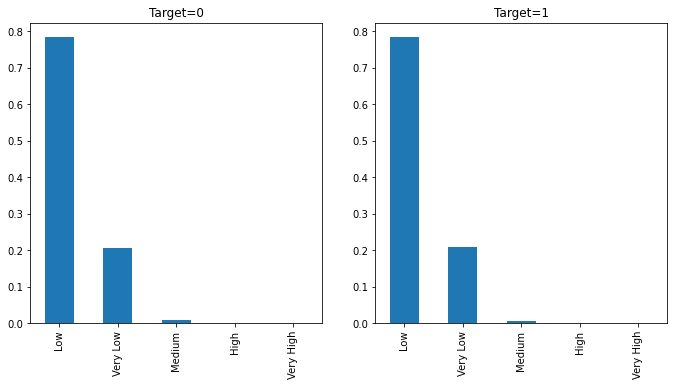

In [71]:
fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0.Income_Buckets .value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2).title.set_text('Target=1')
df_1.Income_Buckets .value_counts(normalize=True).plot.bar()
fig.tight_layout(pad=3.0)
plt.show()

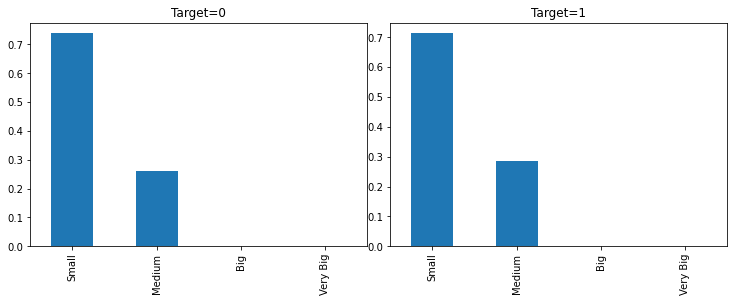

In [73]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0.Family_Size.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2).title.set_text('Target=1')
df_1.Family_Size.value_counts(normalize=True).plot.bar()
fig.tight_layout(pad=0.0)
plt.show()

In [75]:
''' From above UNIVRIATE Analaysis - its clear that the graphs are similar for all the categories analysed above
irrespective of Target=0 or Target=1. It is observed that the same group is doing the on time payment as well as 
late payment in all categories that is analysed '''

' From above UNIVRIATE Analaysis - its clear that the graphs are similar for all the categories analysed above\nirrespective of Target=0 or Target=1. It is observed that the same group is doing the on time payment as well as \nlate payment in all categories that is analysed '

# Correlation

In [79]:
# Correlation for Target =1
corr=df_1[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','Total_Number_of_Credit_Bureau_Checks']].corr()
corr=corr.where (np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corrdf= corr.unstack().reset_index()
corrdf.columns=['VAR1','VAR2','Correlation']
corrdf.dropna(subset=['Correlation'],inplace=True)
corrdf['Correlation']=round(corrdf['Correlation'],2)
corrdf['Correlation']=corrdf['Correlation'].abs()
corrdf.sort_values(by='Correlation',ascending=False)


,VAR1,VAR2,Correlation
30,AMT_GOODS_PRICE,AMT_CREDIT,0.98
35,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
23,AMT_ANNUITY,AMT_CREDIT,0.75
31,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
38,CNT_FAM_MEMBERS,AMT_ANNUITY,0.08
22,AMT_ANNUITY,AMT_INCOME_TOTAL,0.05
37,CNT_FAM_MEMBERS,AMT_CREDIT,0.05
39,CNT_FAM_MEMBERS,AMT_GOODS_PRICE,0.05
29,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.04
15,AMT_CREDIT,AMT_INCOME_TOTAL,0.04


In [81]:
# Correlation for Target =0
corr0=df_0[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','Total_Number_of_Credit_Bureau_Checks']].corr()
corr0=corr0.where (np.triu(np.ones(corr0.shape),k=1).astype(np.bool))
corrdf0= corr0.unstack().reset_index()
corrdf0.columns=['VAR1','VAR2','Correlation']
corrdf0.dropna(subset=['Correlation'],inplace=True)
corrdf0['Correlation']=round(corrdf0['Correlation'],2)
corrdf0['Correlation']=corrdf0['Correlation'].abs()
corrdf0.sort_values(by='Correlation',ascending=False)

,VAR1,VAR2,Correlation
30,AMT_GOODS_PRICE,AMT_CREDIT,0.99
35,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
31,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
23,AMT_ANNUITY,AMT_CREDIT,0.77
22,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
29,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35
15,AMT_CREDIT,AMT_INCOME_TOTAL,0.34
38,CNT_FAM_MEMBERS,AMT_ANNUITY,0.08
37,CNT_FAM_MEMBERS,AMT_CREDIT,0.06
43,Total_Number_of_Credit_Bureau_Checks,AMT_INCOME_TOTAL,0.06


# PERFORM UNIVARIATE ANALYSIS FOR CONTINUOUS/NUMERICAL VARIABLES

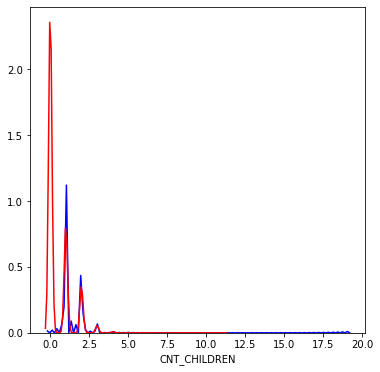

In [82]:
fig = plt.figure(figsize=(6,6))
sns.distplot(df_0['CNT_CHILDREN'],hist=False,color="b")
sns.distplot(df_1['CNT_CHILDREN'],hist=False,color="r")

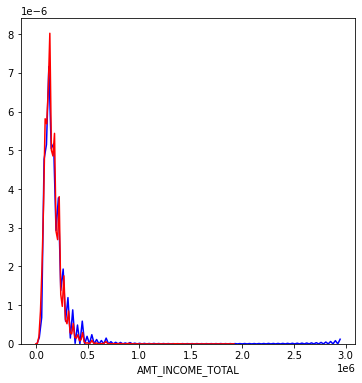

In [83]:
fig = plt.figure(figsize=(6,6))

# As AMT_INCOME_TOTAL is having an outlier the graph was not coming correcting, so capping the AMT_INCOME_TOTAL below 3000000 to get correct graph
df=df_0[df_0.AMT_INCOME_TOTAL<3000000] 
sns.distplot(df['AMT_INCOME_TOTAL'],hist=False,color="b")
df=df_1[df_1.AMT_INCOME_TOTAL<3000000]
sns.distplot(df['AMT_INCOME_TOTAL'],hist=False,color="r")

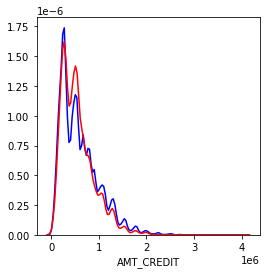

In [84]:
fig = plt.figure(figsize=(4,4))
sns.distplot(df_0['AMT_CREDIT'],hist=False,color="b")
sns.distplot(df_1['AMT_CREDIT'],hist=False,color="r")

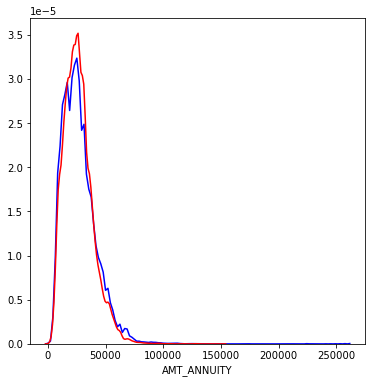

In [85]:
fig = plt.figure(figsize=(6,6))
sns.distplot(df_0['AMT_ANNUITY'],hist=False,color="b")
sns.distplot(df_1['AMT_ANNUITY'],hist=False,color="r")

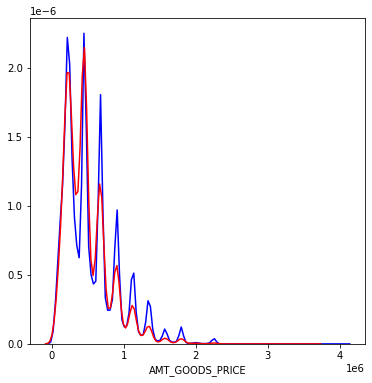

In [86]:
fig = plt.figure(figsize=(6,6))
sns.distplot(df_0['AMT_GOODS_PRICE'],hist=False,color="b")
sns.distplot(df_1['AMT_GOODS_PRICE'],hist=False,color="r")

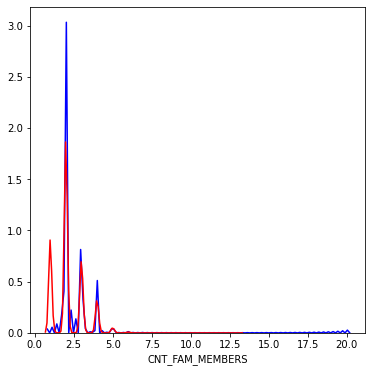

In [87]:
fig = plt.figure(figsize=(6,6))
sns.distplot(df_0['CNT_FAM_MEMBERS'],hist=False,color="b")
sns.distplot(df_1['CNT_FAM_MEMBERS'],hist=False,color="r")

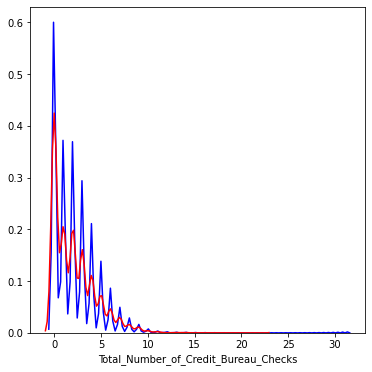

In [90]:
fig = plt.figure(figsize=(6,6))
df=df_0[df_0.Total_Number_of_Credit_Bureau_Checks<50] 
sns.distplot(df['Total_Number_of_Credit_Bureau_Checks'],hist=False,color="b")
df=df_1[df_1.Total_Number_of_Credit_Bureau_Checks<50] 
sns.distplot(df['Total_Number_of_Credit_Bureau_Checks'],hist=False,color="r")

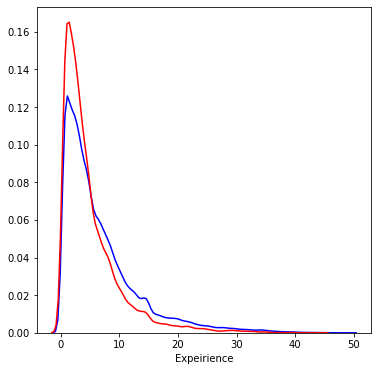

In [91]:
fig = plt.figure(figsize=(6,6))

# As experiance is having an outlier the graph was not coming correcting, so capping the experience below 1000 to get correct graph
df=df_0[df_0.Expeirience<999] 
sns.distplot(df['Expeirience'],hist=False,color="b")
df=df_1[df_1.Expeirience<999]
sns.distplot(df['Expeirience'],hist=False,color="r")

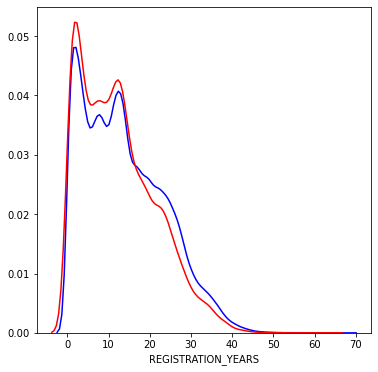

In [92]:
fig = plt.figure(figsize=(6,6))
sns.distplot(df_0['REGISTRATION_YEARS'],hist=False,color="b")
sns.distplot(df_1['REGISTRATION_YEARS'],hist=False,color="r")

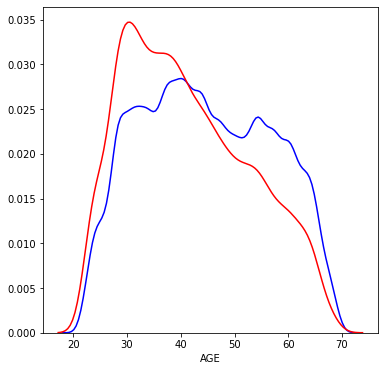

In [93]:
fig = plt.figure(figsize=(6,6))
sns.distplot(df_0['AGE'],hist=False,color="b")#-->Blue
sns.distplot(df_1['AGE'],hist=False,color="r")

# Bivariate Analysis


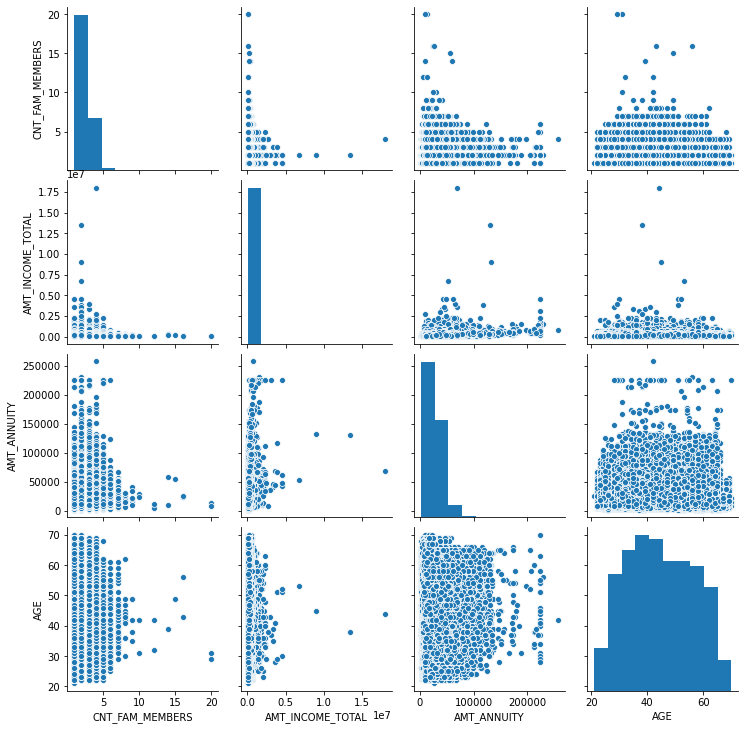

In [94]:
#Pair plots for numerical variables for target=0
sns.pairplot(data=df_0, vars=["CNT_FAM_MEMBERS","AMT_INCOME_TOTAL","AMT_ANNUITY","AGE"])
plt.show()

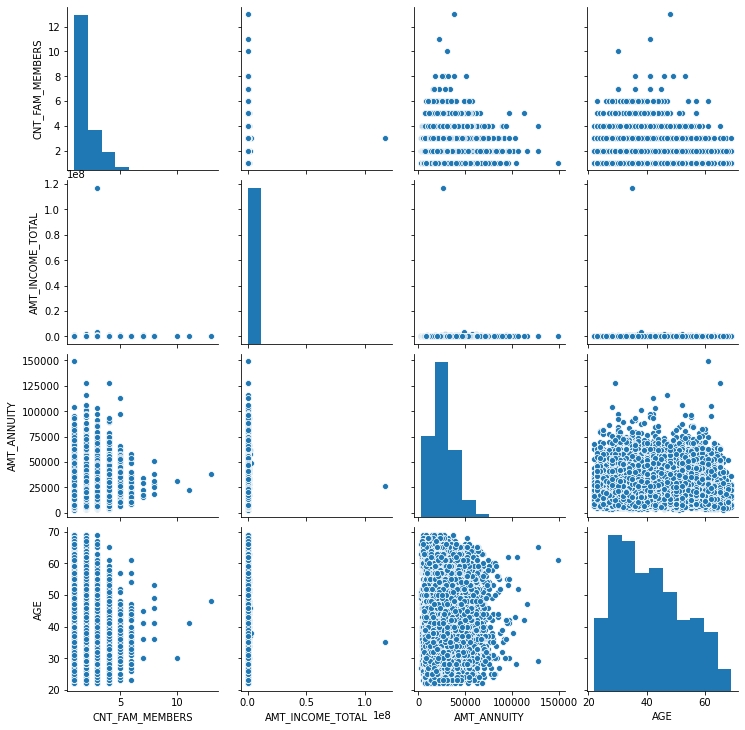

In [95]:
#Pair plots for numerical variables for target=1
sns.pairplot(data=df_1, vars=["CNT_FAM_MEMBERS","AMT_INCOME_TOTAL","AMT_ANNUITY","AGE"])
plt.show()

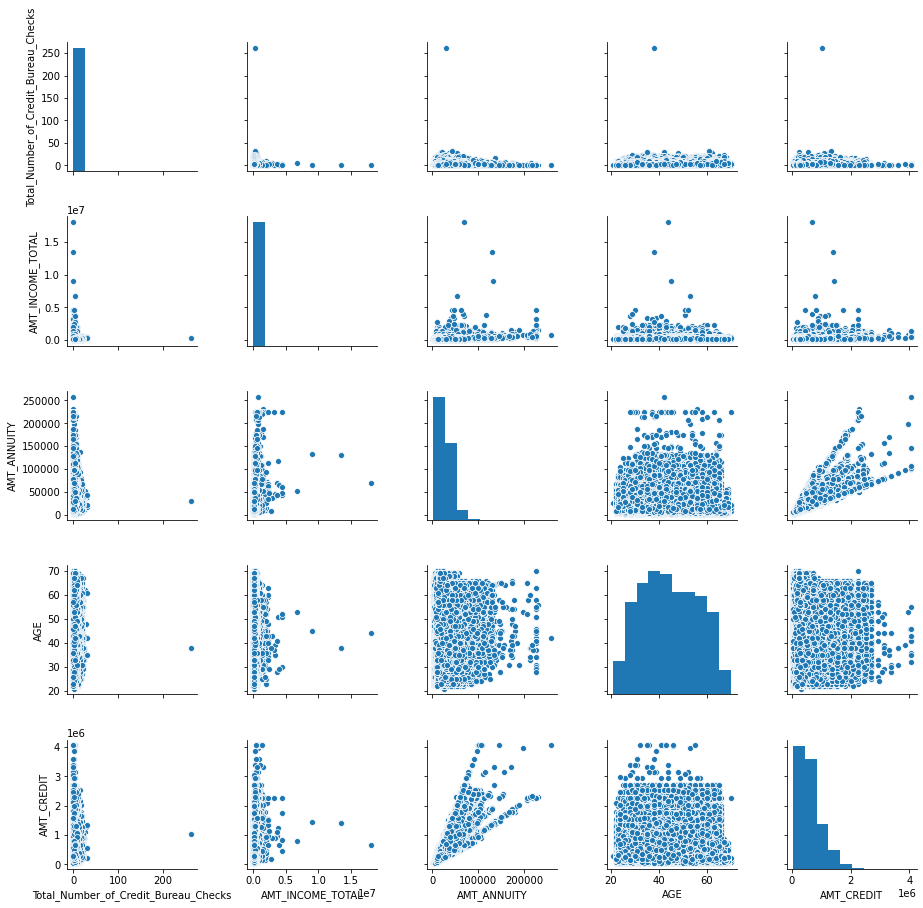

In [99]:
#Pair plots for numerical variables for target=0
sns.pairplot(data=df_0, vars=["Total_Number_of_Credit_Bureau_Checks","AMT_INCOME_TOTAL","AMT_ANNUITY","AGE","AMT_CREDIT"])
plt.show()

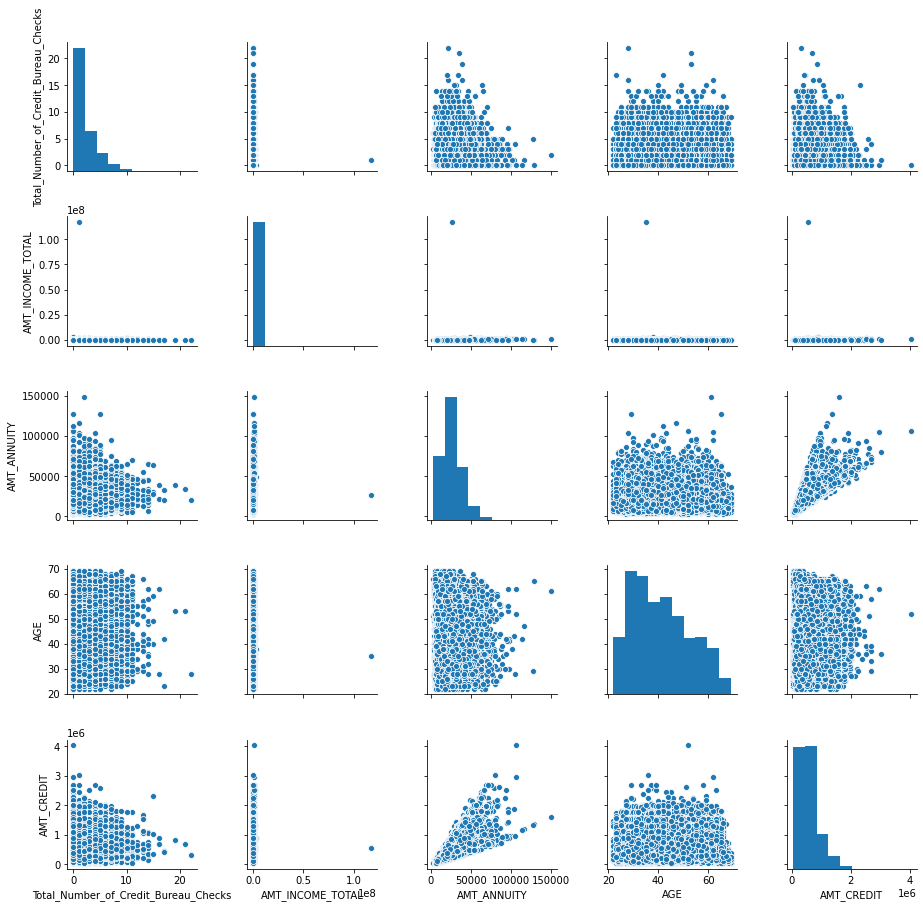

In [100]:
#Pair plots for numerical variables for target=1

sns.pairplot(data=df_1, vars=["Total_Number_of_Credit_Bureau_Checks","AMT_INCOME_TOTAL","AMT_ANNUITY","AGE","AMT_CREDIT"])
plt.show()

# BIVARIATE ANALYSIS Categorical-Numerical

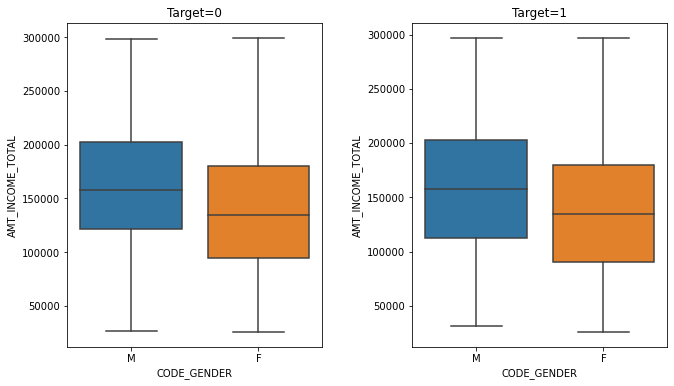

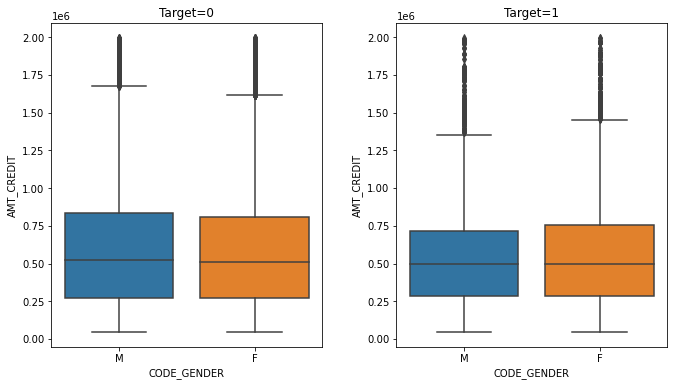

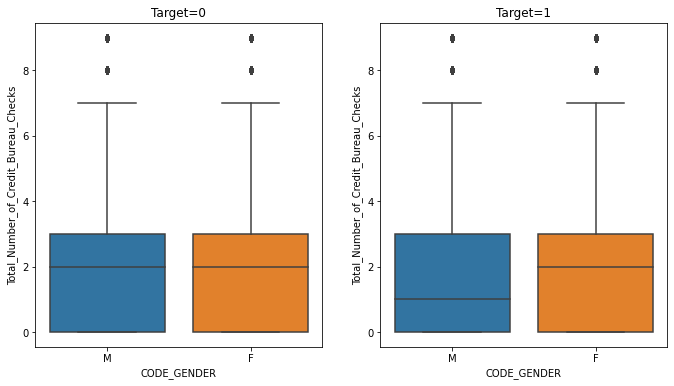

In [102]:
#Bivariate analysis-CODE_GENDER

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0_filter=df_0[df_0.AMT_INCOME_TOTAL<300000]
sns.boxplot(data=df_0_filter, x="CODE_GENDER", y="AMT_INCOME_TOTAL",order=["M", "F"])

plt.subplot(1,2,2).title.set_text('Target=1')
df_1_filter=df_1[df_1.AMT_INCOME_TOTAL<300000]
sns.boxplot(data=df_1_filter, x="CODE_GENDER", y="AMT_INCOME_TOTAL",order=["M", "F"])
fig.tight_layout(pad=3.0)
plt.show()
#According to this plot below irrespective of target value, male employees have more Salary band when compared to female

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0_filter=df_0[df_0.AMT_CREDIT<2000000]
sns.boxplot(data=df_0_filter, x="CODE_GENDER", y="AMT_CREDIT",order=["M", "F"])

plt.subplot(1,2,2).title.set_text('Target=1')
df_1_filter=df_1[df_1.AMT_CREDIT<2000000]
sns.boxplot(data=df_1_filter, x="CODE_GENDER", y="AMT_CREDIT",order=["M", "F"])
fig.tight_layout(pad=3.0)
plt.show()


fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0_filter=df_0[df_0.Total_Number_of_Credit_Bureau_Checks<10]
sns.boxplot(data=df_0_filter, x="CODE_GENDER", y="Total_Number_of_Credit_Bureau_Checks",order=["M", "F"])

plt.subplot(1,2,2).title.set_text('Target=1')
df_1_filter=df_1[df_1.Total_Number_of_Credit_Bureau_Checks<10]
sns.boxplot(data=df_1_filter, x="CODE_GENDER", y="Total_Number_of_Credit_Bureau_Checks",order=["M", "F"])
fig.tight_layout(pad=3.0)
plt.show()
#according to third gragh whenever the payment  miss (target=1) is observed number of credit buerou check for female was less than male

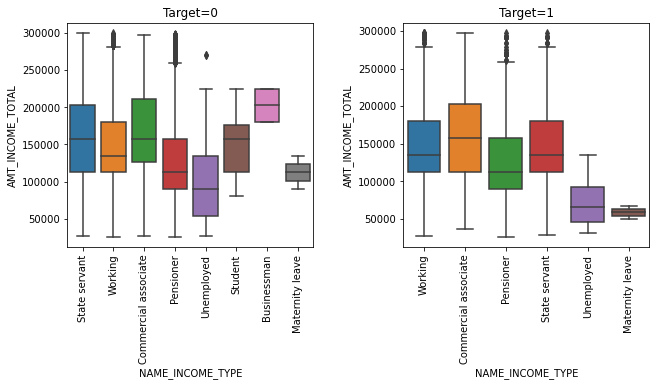

In [103]:
#Bivariate analysis-NAME_INCOME_TYPE

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0_filter=df_0[df_0.AMT_INCOME_TOTAL<300000]
sns.boxplot(data=df_0_filter, x="NAME_INCOME_TYPE", y="AMT_INCOME_TOTAL")
plt.xticks(rotation=90)

plt.subplot(1,2,2).title.set_text('Target=1')
df_1_filter=df_1[df_1.AMT_INCOME_TOTAL<300000]
sns.boxplot(data=df_1_filter, x="NAME_INCOME_TYPE", y="AMT_INCOME_TOTAL")
fig.tight_layout(pad=3.0)
plt.xticks(rotation=90)
plt.show()
#Accrding to below plot where target=0 working,commertial associates,pensioners are in higher range than median where as students are less
#When we see the once who missed ontime payment students and Businessman are not there so we can take this point .


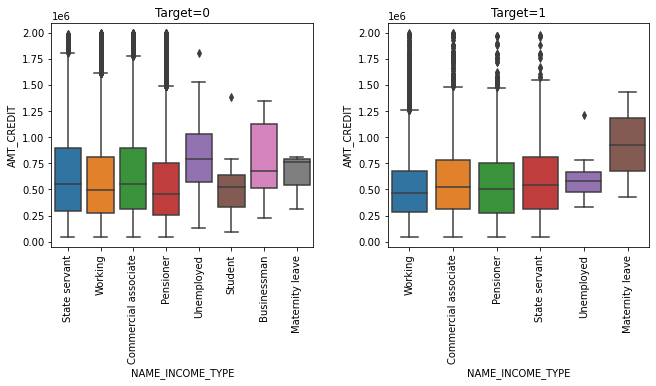

In [104]:
#Bivariate analysis-NAME_INCOME_TYPE

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0_filter=df_0[df_0.AMT_CREDIT<2000000]
sns.boxplot(data=df_0_filter, x="NAME_INCOME_TYPE", y="AMT_CREDIT")
plt.xticks(rotation=90)
#Business-men are asking more amount-credit than median range.Stateservant and working category also seen in higher range 
#where as the unemployed category is lower than median range

plt.subplot(1,2,2).title.set_text('Target=1')
df_1_filter=df_1[df_1.AMT_CREDIT<2000000]
sns.boxplot(data=df_1_filter, x="NAME_INCOME_TYPE", y="AMT_CREDIT")
fig.tight_layout(pad=3.0)
plt.xticks(rotation=90)
plt.show()

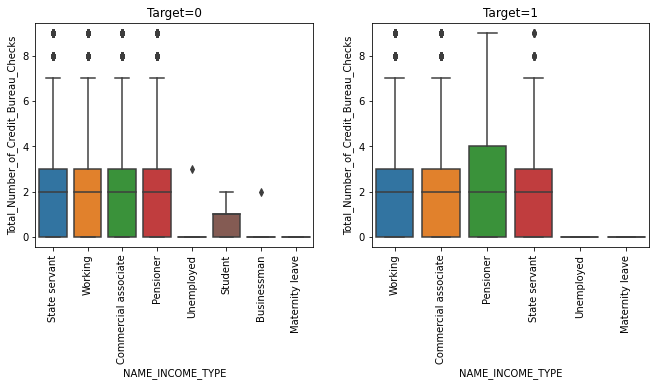

In [105]:
#Bivariate analysis-NAME_INCOME_TYPE

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0_filter=df_0[df_0.Total_Number_of_Credit_Bureau_Checks<10]
sns.boxplot(data=df_0_filter, x="NAME_INCOME_TYPE", y="Total_Number_of_Credit_Bureau_Checks")
plt.xticks(rotation=90)

plt.subplot(1,2,2).title.set_text('Target=1')
df_1_filter=df_1[df_1.Total_Number_of_Credit_Bureau_Checks<10]
sns.boxplot(data=df_1_filter, x="NAME_INCOME_TYPE", y="Total_Number_of_Credit_Bureau_Checks")
fig.tight_layout(pad=3.0)
plt.xticks(rotation=90)
plt.show()

#The target=1 where missed payment happened,Pensioners have more creadit checks,others categories
#have almost same number of credit checks


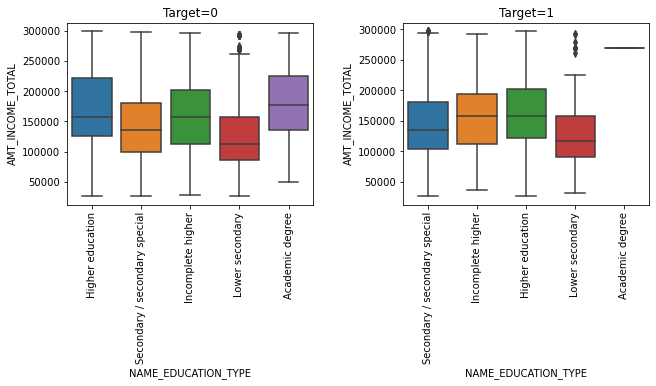

In [106]:
#Bivariate analysis-NAME_EDUCATION_TYPE

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0_filter=df_0[df_0.AMT_INCOME_TOTAL<300000]
sns.boxplot(data=df_0_filter, x="NAME_EDUCATION_TYPE", y="AMT_INCOME_TOTAL")
plt.xticks(rotation=90)

plt.subplot(1,2,2).title.set_text('Target=1')
df_1_filter=df_1[df_1.AMT_INCOME_TOTAL<300000]
sns.boxplot(data=df_1_filter, x="NAME_EDUCATION_TYPE", y="AMT_INCOME_TOTAL")
fig.tight_layout(pad=3.0)
plt.xticks(rotation=90)
plt.show()

#Higher education and acedamic degree people have more salary in target-0 category so,it is good to give loan to them

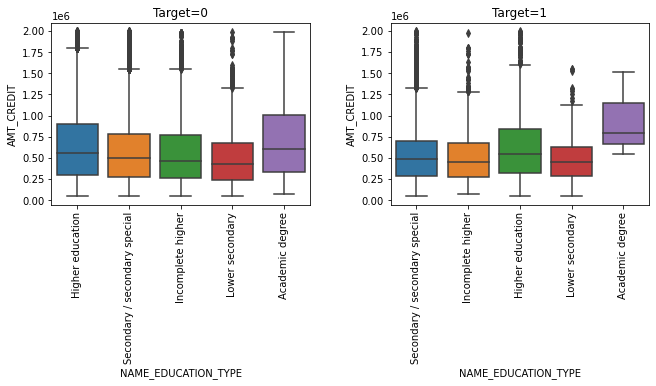

In [107]:
#Bivariate analysis-NAME_EDUCATION_TYPE

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0_filter=df_0[df_0.AMT_CREDIT<2000000]
sns.boxplot(data=df_0_filter, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT")
plt.xticks(rotation=90)


plt.subplot(1,2,2).title.set_text('Target=1')
df_1_filter=df_1[df_1.AMT_CREDIT<2000000]
sns.boxplot(data=df_1_filter, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT")
fig.tight_layout(pad=3.0)
plt.xticks(rotation=90)
plt.show()
#Higher education and acedamic degree people have asked for more credit in target-0 category so,it is good to give loan to them
#But the same are rejected in target1 category which may not be good

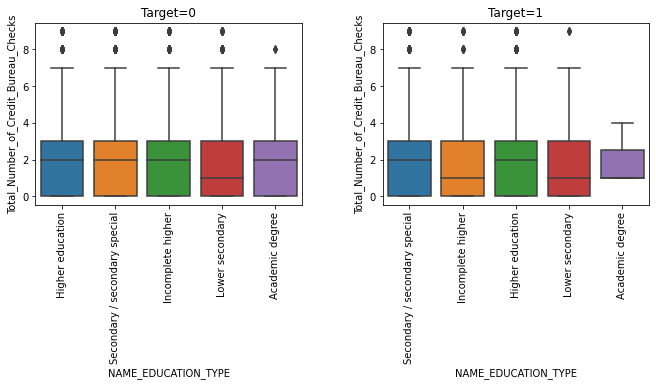

In [108]:
#Bivariate analysis-NAME_EDUCATION_TYPE

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0_filter=df_0[df_0.Total_Number_of_Credit_Bureau_Checks<10]
sns.boxplot(data=df_0_filter, x="NAME_EDUCATION_TYPE", y="Total_Number_of_Credit_Bureau_Checks")
plt.xticks(rotation=90)

plt.subplot(1,2,2).title.set_text('Target=1')
df_1_filter=df_1[df_1.Total_Number_of_Credit_Bureau_Checks<10]
sns.boxplot(data=df_1_filter, x="NAME_EDUCATION_TYPE", y="Total_Number_of_Credit_Bureau_Checks")
fig.tight_layout(pad=3.0)
plt.xticks(rotation=90)
plt.show()

#The Number_of_Credit_Bureau_Checks is almost same in all category except where ontime payment was not done,acadamic degree had less credit checks


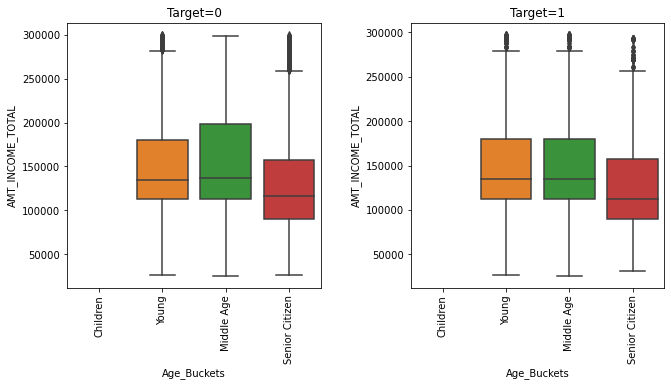

In [109]:
#Bivariate analysis-Age_Buckets

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0_filter=df_0[df_0.AMT_INCOME_TOTAL<300000]
sns.boxplot(data=df_0_filter, x="Age_Buckets", y="AMT_INCOME_TOTAL")
plt.xticks(rotation=90)

plt.subplot(1,2,2).title.set_text('Target=1')
df_1_filter=df_1[df_1.AMT_INCOME_TOTAL<300000]
sns.boxplot(data=df_1_filter, x="Age_Buckets", y="AMT_INCOME_TOTAL")
fig.tight_layout(pad=3.0)
plt.xticks(rotation=90)
plt.show()

#Income of middle age people is higher range and the once in senior citizen category who could not do on time payment have comparitively lower salary range


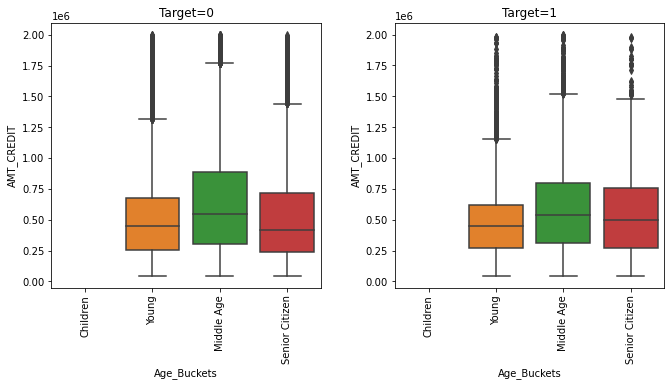

In [110]:
#Bivariate analysis-Age_Buckets

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0_filter=df_0[df_0.AMT_CREDIT<2000000]
sns.boxplot(data=df_0_filter, x="Age_Buckets", y="AMT_CREDIT")
plt.xticks(rotation=90)


plt.subplot(1,2,2).title.set_text('Target=1')
df_1_filter=df_1[df_1.AMT_CREDIT<2000000]
sns.boxplot(data=df_1_filter, x="Age_Buckets", y="AMT_CREDIT")
fig.tight_layout(pad=3.0)
plt.xticks(rotation=90)
plt.show()

#Middle age people are seems to ask more creadit and pay ontime

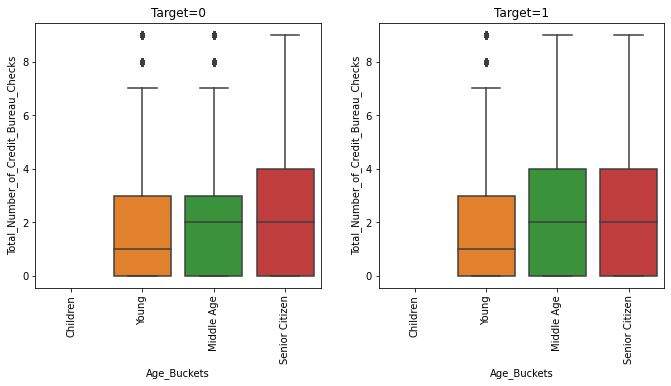

In [111]:
#Bivariate analysis-Age_Buckets

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0_filter=df_0[df_0.Total_Number_of_Credit_Bureau_Checks<10]
sns.boxplot(data=df_0_filter, x="Age_Buckets", y="Total_Number_of_Credit_Bureau_Checks")
plt.xticks(rotation=90)

plt.subplot(1,2,2).title.set_text('Target=1')
df_1_filter=df_1[df_1.Total_Number_of_Credit_Bureau_Checks<10]
sns.boxplot(data=df_1_filter, x="Age_Buckets", y="Total_Number_of_Credit_Bureau_Checks")
fig.tight_layout(pad=3.0)
plt.xticks(rotation=90)
plt.show()

#Senior citizen seems to be having more credit check irrespective of if they on time or not

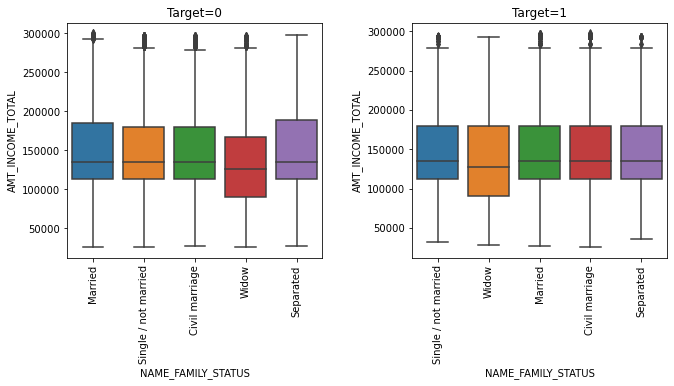

In [112]:
#Bivariate analysis-NAME_FAMILY_STATUS

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0_filter=df_0[df_0.AMT_INCOME_TOTAL<300000]
sns.boxplot(data=df_0_filter, x="NAME_FAMILY_STATUS", y="AMT_INCOME_TOTAL")
plt.xticks(rotation=90)

plt.subplot(1,2,2).title.set_text('Target=1')
df_1_filter=df_1[df_1.AMT_INCOME_TOTAL<300000]
sns.boxplot(data=df_1_filter, x="NAME_FAMILY_STATUS", y="AMT_INCOME_TOTAL")
fig.tight_layout(pad=3.0)
plt.xticks(rotation=90)
plt.show()

#Maried and Seperated people who paid ontime have more salary band

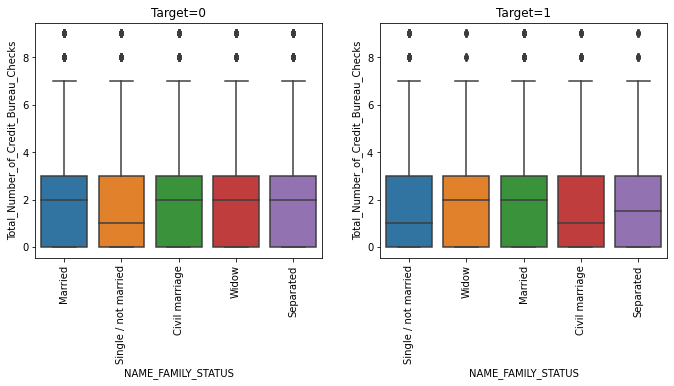

In [114]:
#Bivariate analysis-NAME_FAMILY_STATUS

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0_filter=df_0[df_0.Total_Number_of_Credit_Bureau_Checks<10]
sns.boxplot(data=df_0_filter, x="NAME_FAMILY_STATUS", y="Total_Number_of_Credit_Bureau_Checks")
plt.xticks(rotation=90)

plt.subplot(1,2,2).title.set_text('Target=1')
df_1_filter=df_1[df_1.Total_Number_of_Credit_Bureau_Checks<10]
sns.boxplot(data=df_1_filter, x="NAME_FAMILY_STATUS", y="Total_Number_of_Credit_Bureau_Checks")
fig.tight_layout(pad=3.0)
plt.xticks(rotation=90)
plt.show()

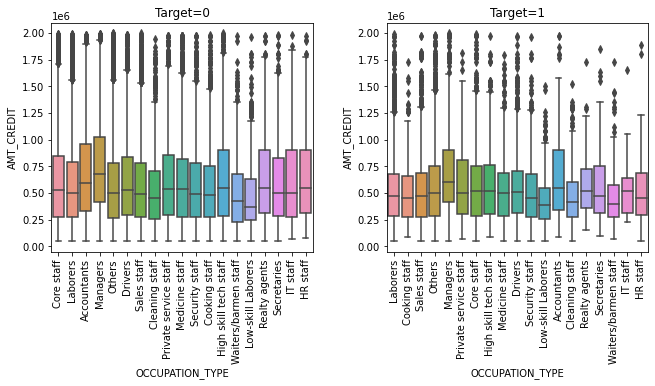

In [115]:
#Bivariate analysis-OCCUPATION_TYPE

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0_filter=df_0[df_0.AMT_CREDIT<2000000]
sns.boxplot(data=df_0_filter, x="OCCUPATION_TYPE", y="AMT_CREDIT")
plt.xticks(rotation=90)


plt.subplot(1,2,2).title.set_text('Target=1')
df_1_filter=df_1[df_1.AMT_CREDIT<2000000]
sns.boxplot(data=df_1_filter, x="OCCUPATION_TYPE", y="AMT_CREDIT")
fig.tight_layout(pad=3.0)
plt.xticks(rotation=90)
plt.show()

#Accountants /Managers Hightech staff realty agents took more loan 

fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Target=0')
df_0_filter=df_0[df_0.Total_Number_of_Credit_Bureau_Checks<10]
sns.boxplot(data=df_0_filter, x="OCCUPATION_TYPE", y="Total_Number_of_Credit_Bureau_Checks")
plt.xticks(rotation=90)

plt.subplot(1,2,2).title.set_text('Target=1')
df_1_filter=df_1[df_1.Total_Number_of_Credit_Bureau_Checks<10]
sns.boxplot(data=df_1_filter, x="OCCUPATION_TYPE", y="Total_Number_of_Credit_Bureau_Checks")
fig.tight_layout(pad=3.0)
plt.xticks(rotation=90)
plt.show()

#Number of Credit_Bureau_Checks done by cleaning staff is very high..so this point has to be taken into consideration
#The ones who did not do ontime payment HR staff has undergone more number of credit check along with cleaning staff

# BIVARIATE Categorical vs Categorical on the application csv

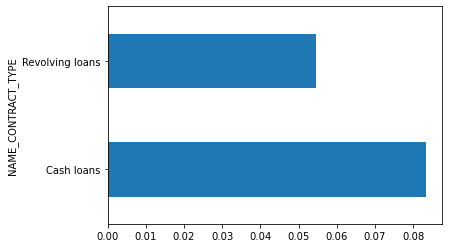

In [117]:
#Check which kind of loan would have more re-payment issues
inp0.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean().plot.barh()
plt.show()

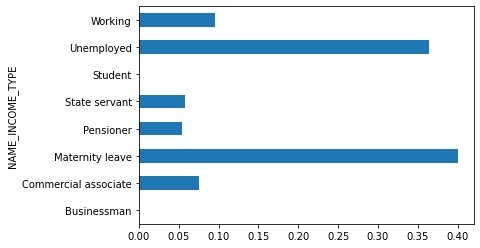

In [118]:
inp0.groupby(['NAME_INCOME_TYPE'])['TARGET'].mean().plot.barh()
plt.show()

# people who are unemployed and who are under Maternity leave have high tendency of missing the installemnt according to the graph

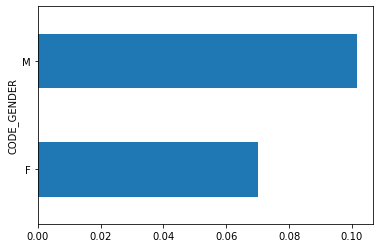

In [119]:
inp0.groupby(['CODE_GENDER'])['TARGET'].mean().plot.barh()
plt.show()

# Males have high tendency of missing the installemnt than Females according to the graph

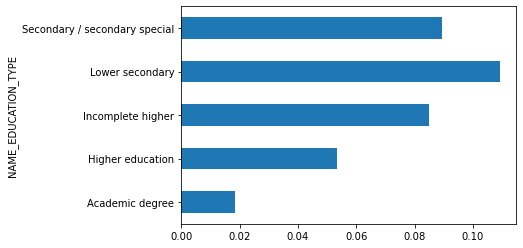

In [120]:
inp0.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].mean().plot.barh()
plt.show()

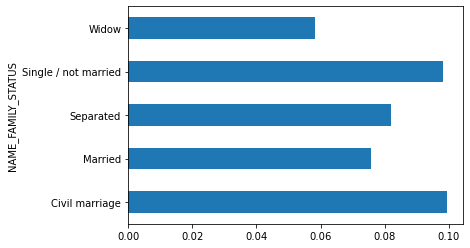

In [121]:
inp0.groupby(['NAME_FAMILY_STATUS'])['TARGET'].mean().plot.barh()
plt.show()

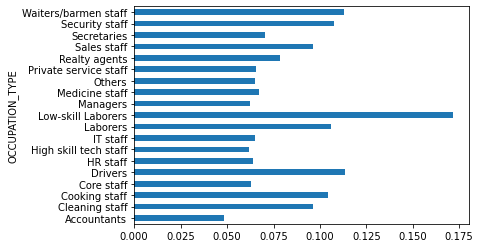

In [122]:
inp0.groupby(['OCCUPATION_TYPE'])['TARGET'].mean().plot.barh()
plt.show()

# Low skilled laborers have very high tendency of missing the installemnts than any other occupation groups
# Drivers/Laborers/cooking and cleaning staff/waiters/security staff are also showing signs of missing installments
# Accountants are more likely to pay installments on time

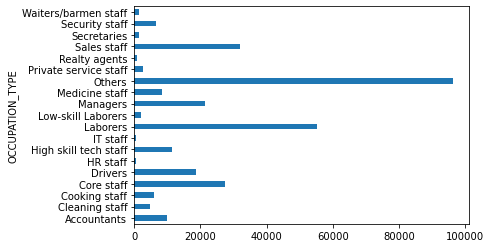

In [123]:
inp0.groupby(['OCCUPATION_TYPE'])['NAME_INCOME_TYPE'].count().plot.barh()
plt.show()


# Multivariate Analysis

(5.5, -0.5)

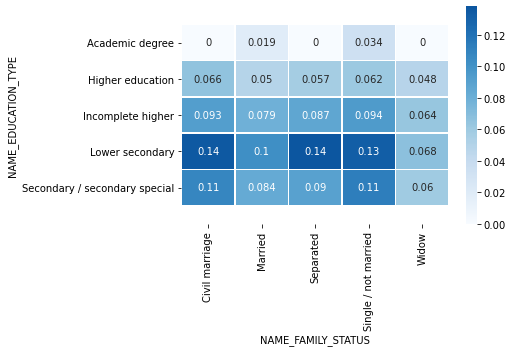

In [124]:
res=pd.pivot_table(data=inp0,index="NAME_EDUCATION_TYPE",columns="NAME_FAMILY_STATUS",values="TARGET")
inp0.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=.5,center=0.081)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#Here higher the value means more mean value of People with lowersecondary education tend to miss more and 
#next is people with secondary education 
#People with acadamic degree under any family status show very less percentage of miss in instalation payment

(5.5, -0.5)

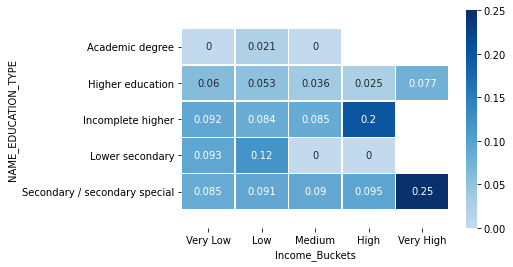

In [125]:
res=pd.pivot_table(data=inp0,index="NAME_EDUCATION_TYPE",columns="Income_Buckets",values="TARGET")
inp0.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=.5,center=0.081)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#Darker blue color/more mean value means that category has more amount of missed installpayment has happened

(19.5, -0.5)

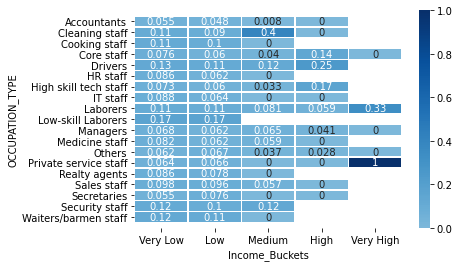

In [126]:
res=pd.pivot_table(data=inp0,index="OCCUPATION_TYPE",columns="Income_Buckets",values="TARGET")
inp0.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=.5,center=0.081)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#Private service staff with very high salary range(>30,00,000) have missed installation payment(Target=1)

(4.5, -0.5)

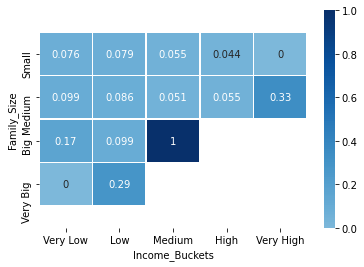

In [127]:
res=pd.pivot_table(data=inp0,index="Family_Size",columns="Income_Buckets",values="TARGET")
inp0.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=.5,center=0.081)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#Very Big Families(>10) with medium salary range miss installments more compared to others

(19.5, -0.5)

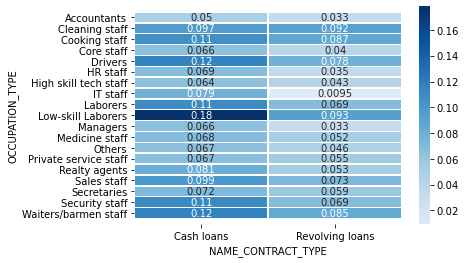

In [128]:
res=pd.pivot_table(data=inp0,index="OCCUPATION_TYPE",columns="NAME_CONTRACT_TYPE",values="TARGET")
inp0.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=.5,center=0.081)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#Its observed that Low-skill Laborers /drivers/barmaen etc take more cash loan and have payment difficulties,so its risky to lend them loan

# Merging application & previous application database

In [130]:
prev_df= pd.read_csv("previous_application.csv",na_values=' ')


#Drop Unwanted columns from Application_data.csv
prev_df.drop(["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_DOWN_PAYMENT","WEEKDAY_APPR_PROCESS_START",
              "HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY","RATE_DOWN_PAYMENT",
              "RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED","NAME_CASH_LOAN_PURPOSE","DAYS_DECISION",
              "NAME_PAYMENT_TYPE","NAME_TYPE_SUITE","NAME_GOODS_CATEGORY","NAME_PORTFOLIO","NAME_PRODUCT_TYPE",
              "CHANNEL_TYPE","SELLERPLACE_AREA","NAME_SELLER_INDUSTRY","CNT_PAYMENT","NAME_YIELD_GROUP",
              "PRODUCT_COMBINATION","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION",
              "DAYS_LAST_DUE","DAYS_TERMINATION","NFLAG_INSURED_ON_APPROVAL","AMT_GOODS_PRICE"],axis=1,inplace=True)

#Understand the data structure
print(prev_df.head())
prev_df.info()
prev_df.describe()



   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS  \
0     2030495      271877     Consumer loans             Approved   
1     2802425      108129         Cash loans             Approved   
2     2523466      122040         Cash loans             Approved   
3     2819243      176158         Cash loans             Approved   
4     1784265      202054         Cash loans              Refused   

  CODE_REJECT_REASON NAME_CLIENT_TYPE  
0                XAP         Repeater  
1                XAP         Repeater  
2                XAP         Repeater  
3                XAP         Repeater  
4                 HC         Repeater  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 6 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   SK_ID_PREV            1670214 non-null  int64 
 1   SK_ID_CURR            1670214 non-null  int64 
 2   NAME_CONTRACT_TYPE  

,SK_ID_PREV,SK_ID_CURR
count,1.670214e+06,1.670214e+06
mean,1.923089e+06,2.783572e+05
std,5.325980e+05,1.028148e+05
min,1.000001e+06,1.000010e+05
25%,1.461857e+06,1.893290e+05
50%,1.923110e+06,2.787145e+05
75%,2.384280e+06,3.675140e+05
max,2.845382e+06,4.562550e+05


In [131]:

#Find percentage of NULL Data:
print(100*prev_df.isnull().sum()/len(prev_df.index))

prev_df.groupby(['CODE_REJECT_REASON']).count()

#There are around 1,353,093 XAP records which is unknown and there are XNA which will be converted to Others.

prev_df['CODE_REJECT_REASON']=prev_df.CODE_REJECT_REASON.replace(to_replace='XNA', value="Others")

prev_df.CODE_REJECT_REASON.unique()


SK_ID_PREV              0.0
SK_ID_CURR              0.0
NAME_CONTRACT_TYPE      0.0
NAME_CONTRACT_STATUS    0.0
CODE_REJECT_REASON      0.0
NAME_CLIENT_TYPE        0.0
dtype: float64


array(['XAP', 'HC', 'LIMIT', 'CLIENT', 'SCOFR', 'SCO', 'Others', 'VERIF',
       'SYSTEM'], dtype=object)

In [132]:
curr_Prev_df=pd.merge(inp0,prev_df, how="inner", on='SK_ID_CURR')
curr_Prev_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,Total_Number_of_Credit_Bureau_Checks,AGE,Expeirience,REGISTRATION_YEARS,Income_Buckets,Age_Buckets,Family_Size,SK_ID_PREV,NAME_CONTRACT_TYPE_y,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1,Business Entity Type 3,1,26,1.75,9.99,Low,Young,Small,1038818,Consumer loans,Approved,XAP,New
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,2,School,0,46,3.25,3.25,Low,Middle Age,Small,1810518,Cash loans,Approved,XAP,Repeater
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,2,School,0,46,3.25,3.25,Low,Middle Age,Small,2636178,Consumer loans,Approved,XAP,Refreshed
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,2,School,0,46,3.25,3.25,Low,Middle Age,Small,2396755,Consumer loans,Approved,XAP,Refreshed
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1,Government,0,53,0.62,11.67,Very Low,Middle Age,Small,1564014,Consumer loans,Approved,XAP,New


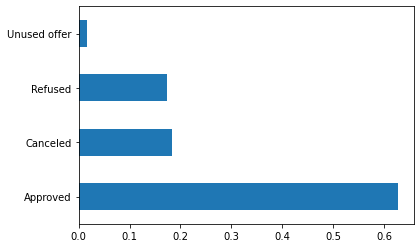

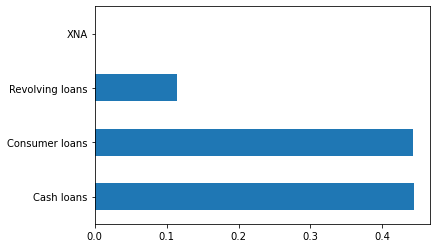

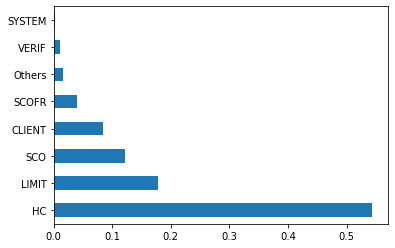

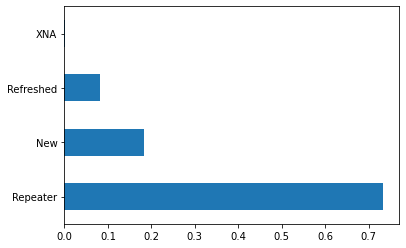

In [133]:
#Univariate analysis on Combined dataset

#check the different contract status
curr_Prev_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.barh()
plt.show()

#Check which kind of loans is asked more
curr_Prev_df.NAME_CONTRACT_TYPE_y.value_counts(normalize=True).plot.barh()
plt.show()

#As XAP is approved status check the count of code rejection reason for others
curr_Prev_df[curr_Prev_df['CODE_REJECT_REASON']!='XAP'].CODE_REJECT_REASON.value_counts(normalize=True).plot.barh()
plt.show()


curr_Prev_df.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()
#Repeated loan application is more than others

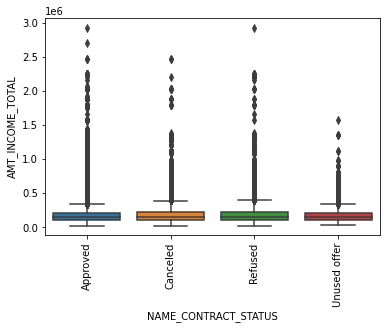

In [134]:
#Bivariate analysis-NAME_CONTRACT_STATUS vs AMT_INCOME_TOTAL

df_0_filter=curr_Prev_df[curr_Prev_df.AMT_INCOME_TOTAL<=3000000]
sns.boxplot(data=df_0_filter, x="NAME_CONTRACT_STATUS", y="AMT_INCOME_TOTAL")
plt.xticks(rotation=90)
plt.show()
#we can see lot of outliers post 3lakh cap

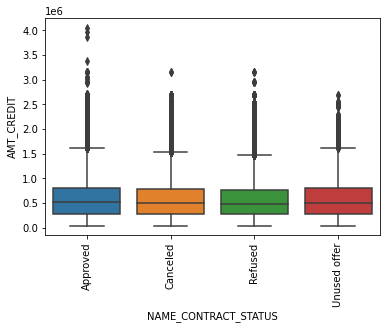

In [135]:
#Bivariate analysis-NAME_CONTRACT_STATUS vs AMT_CREDIT

sns.boxplot(data=curr_Prev_df, x="NAME_CONTRACT_STATUS", y="AMT_CREDIT")
plt.xticks(rotation=90)
plt.show()

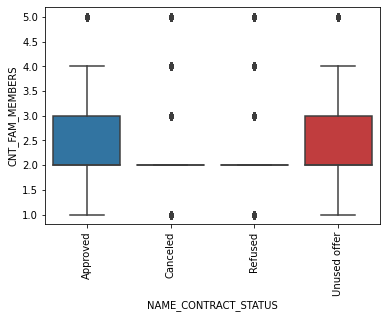

In [136]:
#Bivariate analysis-NAME_CONTRACT_STATUS vs CNT_FAM_MEMBERS
df_0_filter=curr_Prev_df[curr_Prev_df.CNT_FAM_MEMBERS<=5]
sns.boxplot(data=df_0_filter, x="NAME_CONTRACT_STATUS", y="CNT_FAM_MEMBERS")
plt.xticks(rotation=90)
plt.show()
#In small family rate of approval and unused offer situation is more

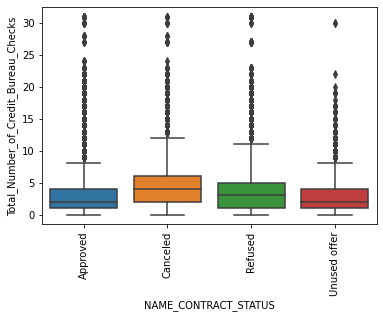

In [138]:
#Bivariate analysis-NAME_CONTRACT_STATUS vs Total_Number_of_Creadit_Bureau_Checks


df_0_filter=curr_Prev_df[curr_Prev_df.Total_Number_of_Credit_Bureau_Checks<50]
sns.boxplot(data=df_0_filter, x="NAME_CONTRACT_STATUS", y="Total_Number_of_Credit_Bureau_Checks")
plt.xticks(rotation=90)
plt.show()
#More the number of creditBureau checks possibility of refuse and cancel is more,Cancel sould be due to they got better offer in some other bank

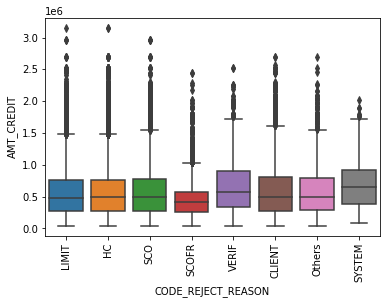

In [139]:
#Bivariate analysis-CODE_REJECT_REASON vs AMT_CREDIT


df_0_filter=curr_Prev_df[curr_Prev_df['CODE_REJECT_REASON']!='XAP']
sns.boxplot(data=df_0_filter, x="CODE_REJECT_REASON", y="AMT_CREDIT")
plt.xticks(rotation=90)
plt.show()
#For hiegher credit amount main rejection reasons are verificationand system issues

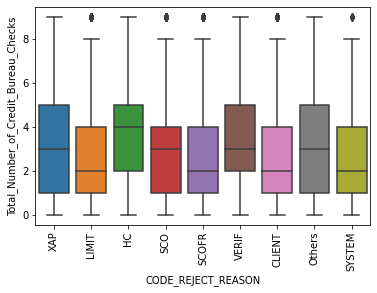

In [141]:
#Bivariate analysis-CODE_REJECT_REASON vs Total_Number_of_Creadit_Bureau_Checks

df_0_filter=curr_Prev_df[curr_Prev_df.Total_Number_of_Credit_Bureau_Checks<10] ## adding this filter to eliminate outliers and get a general idea
sns.boxplot(data=df_0_filter, x="CODE_REJECT_REASON", y="Total_Number_of_Credit_Bureau_Checks")
plt.xticks(rotation=90)
plt.show()

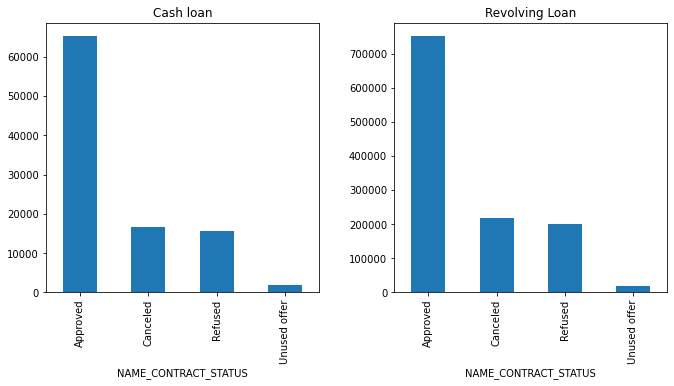

In [142]:
#Bivariate Categorical-Categorical NAME_CONTRACT_STATUS Vs NAME_CONTRACT_TYPE_x where Target=0[#NAME_CONTRACT_TYPE_x-Current application]
fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Cash loan')
df_0_prev_target_0=curr_Prev_df[curr_Prev_df['TARGET']==0]
df_0_cash=df_0_prev_target_0[df_0_prev_target_0['NAME_CONTRACT_TYPE_x']!='Cash loans']
df_0_revol=df_0_prev_target_0[df_0_prev_target_0['NAME_CONTRACT_TYPE_x']!='Revolving loans']
df_0_cash.groupby(["NAME_CONTRACT_STATUS"]).NAME_CONTRACT_TYPE_x.count().plot.bar()
plt.subplot(1,2,2).title.set_text('Revolving Loan')
df_0_revol.groupby(["NAME_CONTRACT_STATUS"]).NAME_CONTRACT_TYPE_x.count().plot.bar()
plt.xticks(rotation=90)
fig.tight_layout(pad=3.0)
plt.show()
#Amount of application approved for revoling loan is more than the ones approved for cash loan

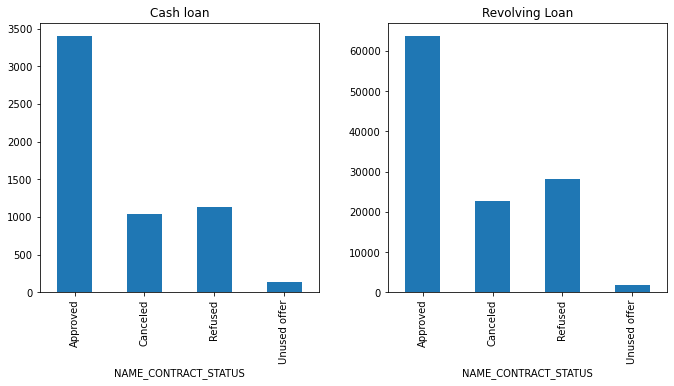

In [143]:
#Bivariate Categorical-Categorical NAME_CONTRACT_STATUS Vs NAME_CONTRACT_TYPE_x where Target=1[#NAME_CONTRACT_TYPE_x-Current application]
fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Cash loan')
df_1_prev_target_1=curr_Prev_df[curr_Prev_df['TARGET']==1]
df_1_cash=df_1_prev_target_1[df_1_prev_target_1['NAME_CONTRACT_TYPE_x']!='Cash loans']
df_1_revol=df_1_prev_target_1[df_1_prev_target_1['NAME_CONTRACT_TYPE_x']!='Revolving loans']
df_1_cash.groupby(["NAME_CONTRACT_STATUS"]).NAME_CONTRACT_TYPE_x.count().plot.bar()
plt.subplot(1,2,2).title.set_text('Revolving Loan')
df_1_revol.groupby(["NAME_CONTRACT_STATUS"]).NAME_CONTRACT_TYPE_x.count().plot.bar()
plt.xticks(rotation=90)
fig.tight_layout(pad=3.0)
plt.show()
#Around 3000+ applications of current application who took cash loan and revolving loan failed to pay installments ontime

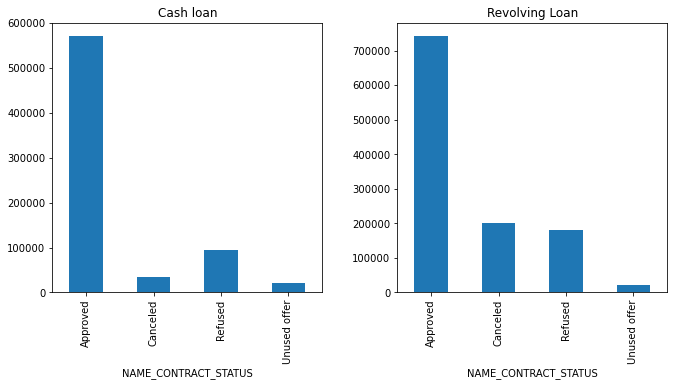

In [144]:
#Bivariate Categorical-Categorical NAME_CONTRACT_STATUS Vs NAME_CONTRACT_TYPE_y where Target=0[#NAME_CONTRACT_TYPE_y-Current application]
fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1).title.set_text('Cash loan')
df_0_prev_target_0=curr_Prev_df[curr_Prev_df['TARGET']==0]
df_0_cash=df_0_prev_target_0[df_0_prev_target_0['NAME_CONTRACT_TYPE_y']!='Cash loans']
df_0_revol=df_0_prev_target_0[df_0_prev_target_0['NAME_CONTRACT_TYPE_y']!='Revolving loans']
df_0_cash.groupby(["NAME_CONTRACT_STATUS"]).NAME_CONTRACT_TYPE_x.count().plot.bar()
plt.subplot(1,2,2).title.set_text('Revolving Loan')
df_0_revol.groupby(["NAME_CONTRACT_STATUS"]).NAME_CONTRACT_TYPE_x.count().plot.bar()
plt.xticks(rotation=90)
fig.tight_layout(pad=3.0)
plt.show()
#Amount of application approved for revoling loan is more than the ones approved for cash loan


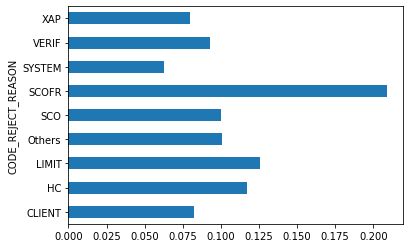

In [145]:
#Bivariate Categorical-Categorical
curr_Prev_df.groupby(['CODE_REJECT_REASON'])['TARGET'].mean().plot.barh()
plt.show()

## People having payment difficulties were previously rejected mainly due to SCOFR reason

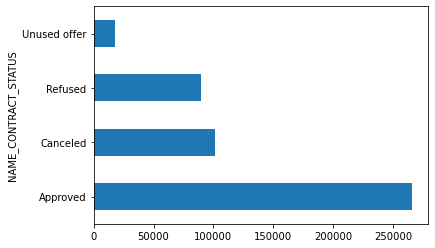

In [146]:
#Check the loan application status and check if prevously approved people missed ontime installments 
df_1_prev=curr_Prev_df[curr_Prev_df['TARGET']==0]
df_1_prev.groupby("NAME_CONTRACT_STATUS").SK_ID_CURR.nunique().plot.barh()
plt.show()

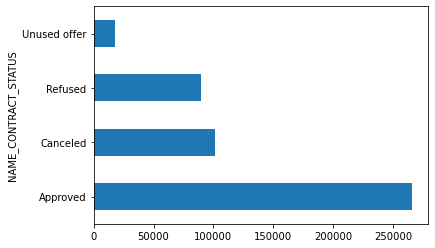

CODE_REJECT_REASON
CLIENT     17459
HC         58966
LIMIT      24990
Others      3288
SCO        19489
SCOFR       5458
SYSTEM       476
VERIF       2267
XAP       266402
Name: SK_ID_CURR, dtype: int64


In [147]:
df_0_prev=curr_Prev_df[curr_Prev_df['TARGET']==0]
df_0_prev.groupby("NAME_CONTRACT_STATUS").SK_ID_CURR.nunique().plot.barh()
plt.show()
print(df_0_prev.groupby("CODE_REJECT_REASON").SK_ID_CURR.nunique())

#More than 1 lakh people canceled previously, who have never missed payment,the cancel reason from client end should be reviewed and may be by giving them 
#benifits and good pricing try to make them accept the loan
#The people who got refused for loan seems to be not missing payment of installment hence can be considered for loan

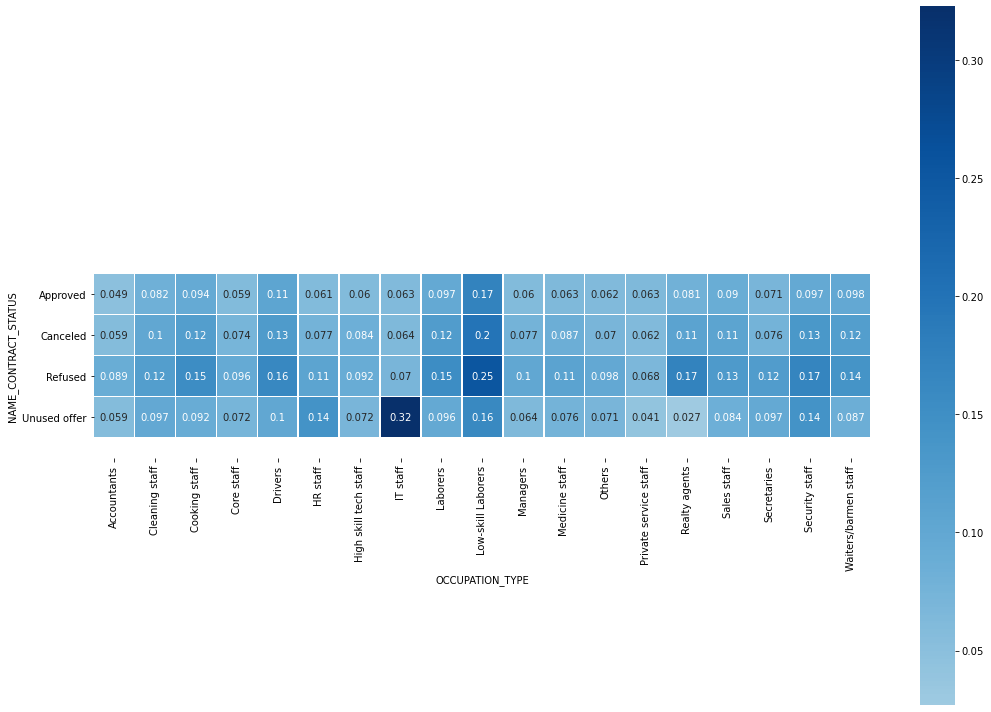

In [148]:
res=pd.pivot_table(data=curr_Prev_df,index="NAME_CONTRACT_STATUS",columns="OCCUPATION_TYPE",values="TARGET")
plt.figure(figsize=(15,10))
curr_Prev_df.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=0.5,center=0.0865,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
#map shows the values based on target=1 values for different contract state
#Low skill laborers were refused for loan in previous applications.Next in line aresecurity staff,realty agents,drivers,laborers,drivers,cooking staff
#It staff have many unused offers



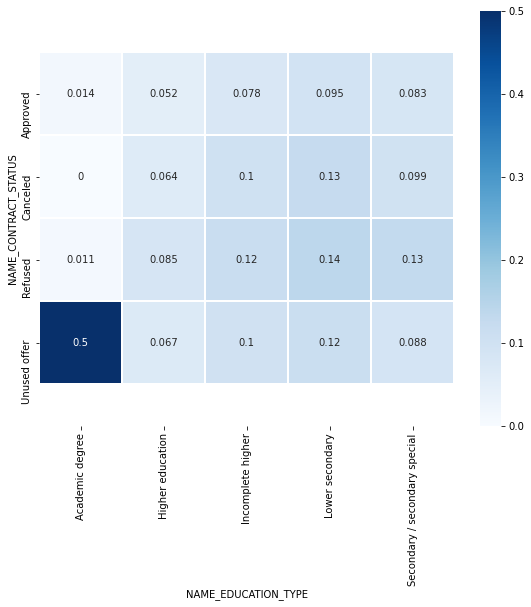

In [149]:
res=pd.pivot_table(data=curr_Prev_df,index="NAME_CONTRACT_STATUS",columns="NAME_EDUCATION_TYPE",values="TARGET")
plt.figure(figsize=(8,8))
curr_Prev_df.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=0.5,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
#People with academic degree have many unused offers,but refused from bank-end is very low
#Refusal is more in incomplete higher/lower secondary and secondary
#For approved applications of higher/lower secondary and secondary payment ontime is less than academic degree

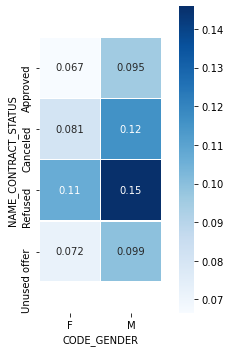

In [150]:
res=pd.pivot_table(data=curr_Prev_df,index="NAME_CONTRACT_STATUS",columns="CODE_GENDER",values="TARGET")
plt.figure(figsize=(5,5))
curr_Prev_df.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=0.5,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()

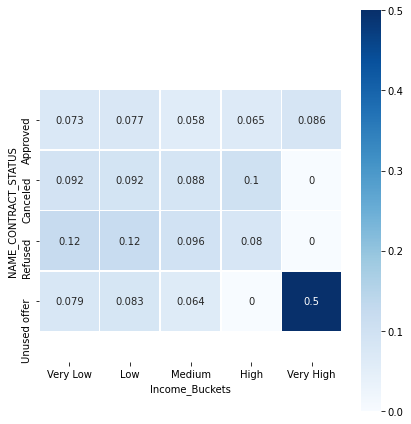

In [151]:
res=pd.pivot_table(data=curr_Prev_df,index="NAME_CONTRACT_STATUS",columns="Income_Buckets",values="TARGET")
plt.figure(figsize=(6,6))
curr_Prev_df.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=0.5,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
#Very High income people apply for loan and dont use it
#Refused percentage is more in Very-Low and Low salary range

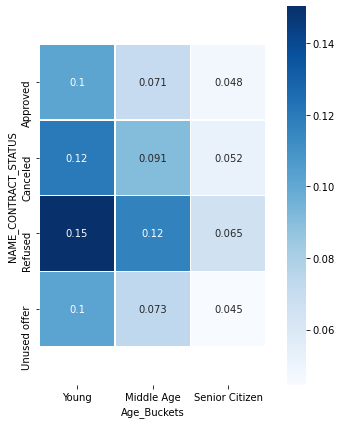

In [152]:
res=pd.pivot_table(data=curr_Prev_df,index="NAME_CONTRACT_STATUS",columns="Age_Buckets",values="TARGET")
plt.figure(figsize=(6,6))
curr_Prev_df.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=0.5,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
#Young (18 to 35) age group has many refusale in previous file,But they have high approval rate and not paying ontime,so these applications can be revied based on Education and Occupation type

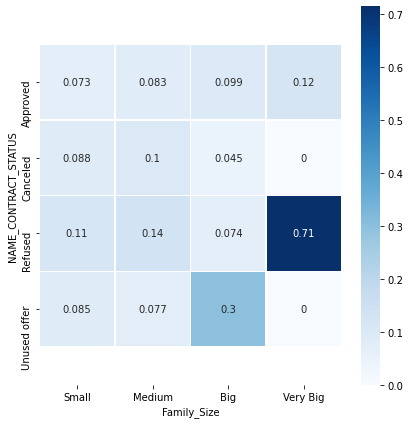

In [153]:
res=pd.pivot_table(data=curr_Prev_df,index="NAME_CONTRACT_STATUS",columns="Family_Size",values="TARGET")
plt.figure(figsize=(6,6))
curr_Prev_df.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=0.5,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
#Huge familyis(size>10) had higher refusal and next is big(Above 6 members) in previous application

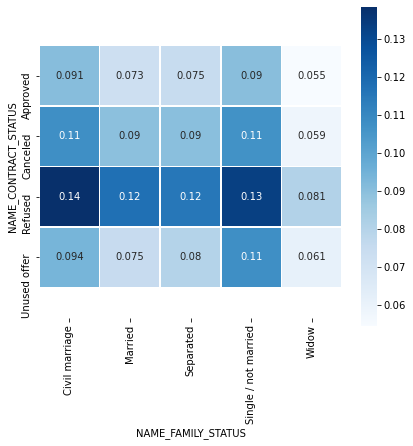

In [154]:
res=pd.pivot_table(data=curr_Prev_df,index="NAME_CONTRACT_STATUS",columns="NAME_FAMILY_STATUS",values="TARGET")
plt.figure(figsize=(6,6))
curr_Prev_df.TARGET.mean()
ax=sns.heatmap(data=res,annot=True,cmap="Blues",linewidths=0.5,square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
#Civil Mariage and single have more approval rate and refused rate as well